<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Kevin Reyes - Diego Quezada </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

# 1. Conceptos básicos de redes neuronales

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa están conectadas a todas las salidas de la capa anterior y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más fácil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta área del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades, learning rate, etc...; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient y el _exploding gradient_, viendo también algunos optimizadores existentes.


<h1 align='center'> <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/water-flea-daphnia-magna-ted-kinsman.jpg" width="40%" height="30%" /> </h1>

Para realizar esto usaremos un problema de regresión sencillo y utilizaremos los paquetes tensorflow y keras para explorar los conceptos básicos del mundo de las redes neuronales artificiales. Dado que puede tomar tiempo entrenar redes neuronales, y existe una amplia gama de conceptos a cubrir, utilizaremos un dataset de tamaño limitado con menos de 1000 observaciones, recordar que las redes neuronales tienen una naturaleza _data hungry_ por lo que su desempeño se puede ver limitado por la poca cantidad de observaciones en algunos casos. El dataset en cuestión consiste de 8 atributos (descriptores moleculares) de 546 productos químicos usados para predecir la toxicidad acuática aguda hacia la especie Daphnia Magna, para su descarga y descripción más detallada: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity.

## 1.a Carga de datos y preprocesamiento.

##### I) Partiremos cargando los datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files   #-> For Google Colab, there are other methods
import io
#uploaded = files.upload()
#header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
#df2 = pd.read_csv(io.BytesIO(uploaded['qsar_aquatic_toxicity.csv']),names=header_list,sep=";")
header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
df2 = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";", names=header_list)

##### II) **Comente y visualice** las distribuciones de cada atributo del dataset utilizando herramientas estadísticas básicas, boxplots e histogramas.

In [2]:
df2.describe()

,TPSA,SAacc,H-050,MLOPG,RDCHI,GATS1p,nN,C-050,LC50-response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

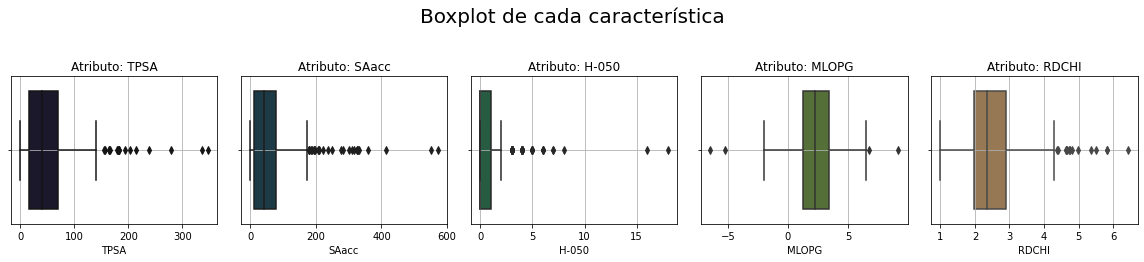

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

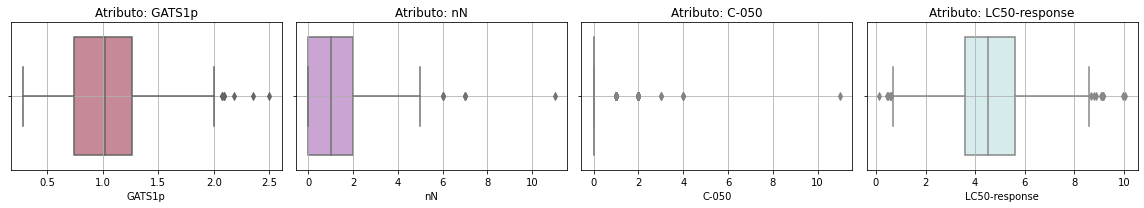

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
import seaborn as sns  # <- Herramienta complementaria para distintos tipos de plots
cols=sns.color_palette("cubehelix", 9) # <-Paleta de colores a utilizar 9 es el número de colores que componen la paleta
plt.suptitle('Boxplot de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  sns.boxplot(df2[i],color=cols[K-1])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1

In [4]:
print("Porcentajes de valores en 0 por cada columna")
1-(df2.astype(bool).sum(axis=0)/546)

Porcentajes de valores en 0 por cada columna


TPSA             0.177656
SAacc            0.197802
H-050            0.542125
MLOPG            0.000000
RDCHI            0.000000
GATS1p           0.000000
nN               0.496337
C-050            0.754579
LC50-response    0.000000
dtype: float64

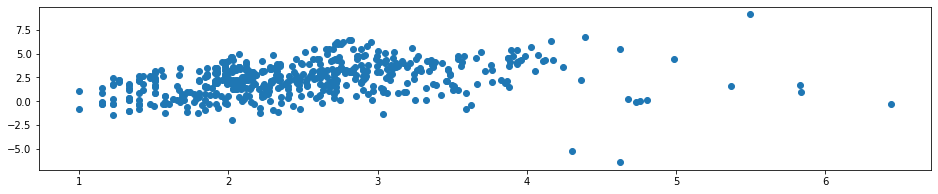

In [5]:
plt.scatter(df2["RDCHI"],df2["MLOPG"])

In [6]:
#plt.hist()

### Testing Pandas
#df2["C-050"].plot()

### Testing Seaborn
#sns.scatterplot(data=df2['C-050'])

### Testing Plotly
import plotly.express as px
#fig = px.box(df2, y="LC50-response", points="all")
fig = px.scatter(df2,x = "RDCHI", y = "MLOPG") # Correlación entre las variables


fig.show()


##### III) **Separe** el dataset en conjuntos de entrenamiento, validación y test, para luego estandarizar, considere un 70% de los datos para entrenamiento, un 20% para validación y un 10% para test. Para esto puede utilizar la librería sklearn, en particular las funciones StandarScaler y train_test_split. **Verifique** que el tamaño de los conjuntos se asemeje al indicado. 

**Pregunta:** ¿Cuál es la función de cada uno de estos conjuntos?

Para aclarar conceptos acerca de estos conjuntos: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

**Respuesta:**

> **Training set:** Es el conjunto de datos etiquetados con el que se **entrena el modelo**, es decir, el utilizado para **ajustar** los parámetros.

> **Validation set:** Es el conjunto de datos etiquetados con el que se **ajustan** los hiperparámetros del modelo.

> **Test set:** Es el conjunto de datos etiquetados con el que se **mide** la capacidad de generalización (calidad) de una hipótesis $f$.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df2.drop(columns=['LC50-response'])
y=np.asarray(df2['LC50-response']).reshape(-1,1)
x_tr, x_test, y_tr, y_test  = train_test_split(x, y, test_size=0.1, shuffle=True) # Primera división para el test set
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.2/0.9, shuffle=True) # Tomamos el 20% del 90% inicial de la data

### Verificación
number_total_instances = df2.shape[0]
number_training_instances = x_tr.shape[0]
number_validation_instances = x_val.shape[0]
number_test_instances = x_test.shape[0]

#print(number_total_instances)
#print(number_training_instances)
#print(number_validation_instances)
#print(number_test_instances)

print("Porcentaje training instances: " + str(number_training_instances / number_total_instances))
print("Porcentaje validation instances: " + str(number_validation_instances / number_total_instances))
print("Porcentaje test instances: " + str(number_test_instances / number_total_instances))

Porcentaje training instances: 0.6978021978021978
Porcentaje validation instances: 0.20146520146520147
Porcentaje test instances: 0.10073260073260074


In [8]:
scaler_x = StandardScaler()
scaler_x.fit(x_tr)
x_tr = scaler_x.transform(x_tr)
x_val = scaler_x.transform(x_val)
x_test = scaler_x.transform(x_test)
scaler_y = StandardScaler()
scaler_y.fit(y_tr.reshape(-1,1))
y_tr = scaler_y.transform(y_tr)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

In [9]:
x_tr_df = pd.DataFrame(data = x_tr, columns=["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050"]) # Pasar a dataframe la training data
x_tr_df.describe() # Estadísticos training data
# Observamos data normalizada, la media es 0 para todas las columnas. Z = (x - mu)/s

,TPSA,SAacc,H-050,MLOPG,RDCHI,GATS1p,nN,C-050
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,1.462814e-16,-1.072341e-16,3.265924e-17,2.637144e-17,8.960461e-17,2.031038e-16,-2.447736e-17,1.092739e-16
std,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00
min,-1.019942e+00,-8.486473e-01,-5.598589e-01,-5.046393e+00,-1.836479e+00,-1.858155e+00,-7.229610e-01,-4.154338e-01
25%,-6.697293e-01,-6.139315e-01,-5.598589e-01,-6.031498e-01,-6.460337e-01,-7.490114e-01,-7.229610e-01,-4.154338e-01
50%,-1.898532e-01,-2.518183e-01,-5.598589e-01,-1.978676e-02,-1.845074e-01,-6.066146e-02,-4.115867e-02,-4.154338e-01
75%,4.190703e-01,2.535910e-01,1.354497e-02,6.033510e-01,5.260967e-01,5.230982e-01,6.406436e-01,-4.154338e-01
max,6.105776e+00,7.148858e+00,9.761410e+00,3.942701e+00,4.804373e+00,3.539190e+00,6.776864e+00,1.248148e+01


Porcentajes de valores en 0 por cada columna


TPSA      0.302198
SAacc     0.302198
H-050     0.302198
MLOPG     0.302198
RDCHI     0.302198
GATS1p    0.302198
nN        0.302198
C-050     0.302198
dtype: float64

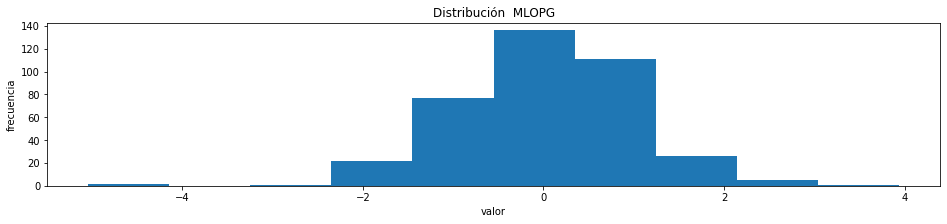

In [10]:
descriptor = "MLOPG"
plt.title("Distribución  " + descriptor)
plt.hist(x_tr_df[descriptor]) # Distribución
plt.xlabel("valor")
plt.ylabel("frecuencia")
print("Porcentajes de valores en 0 por cada columna")
1-(x_tr_df.astype(bool).sum(axis=0)/546)

##### IV) **Visualice** de la forma que estime conveniente para realizar comparaciones, las distribuciones para todas las variables (atributos y target) antes de estandarizar, y después de estandarizar para los conjuntos de entrenamiento, validación y test. **Comente**. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

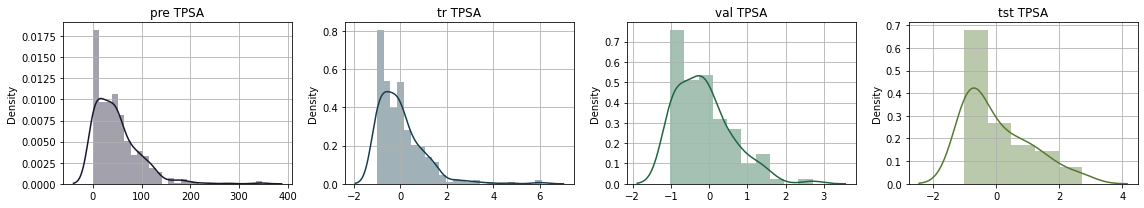

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

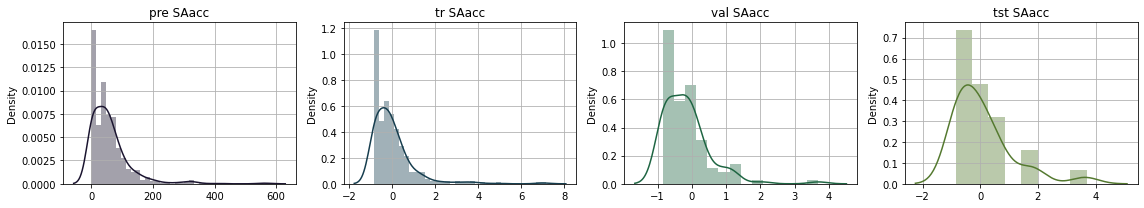

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

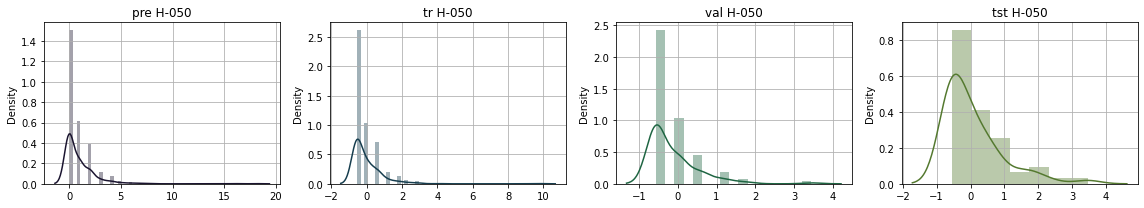

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

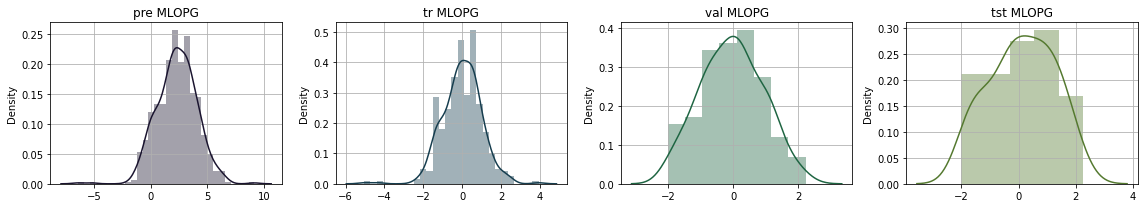

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

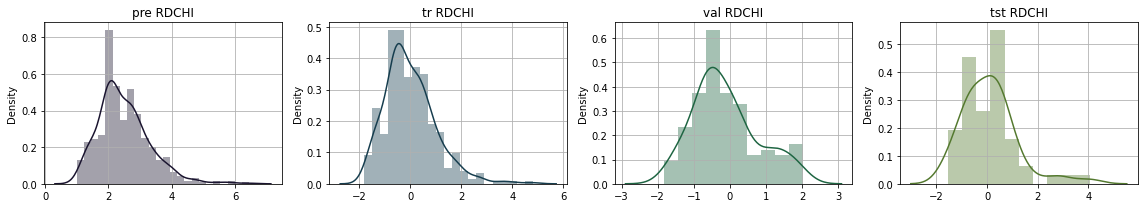

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

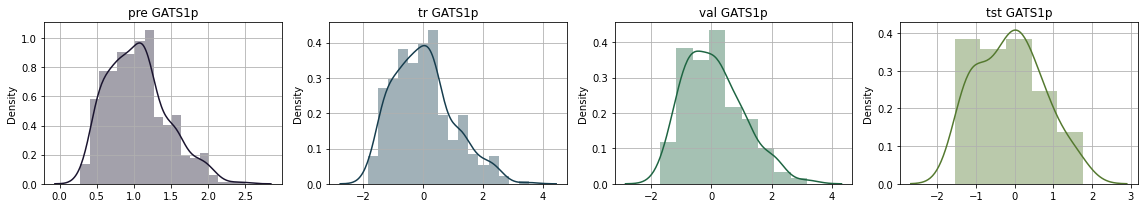

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

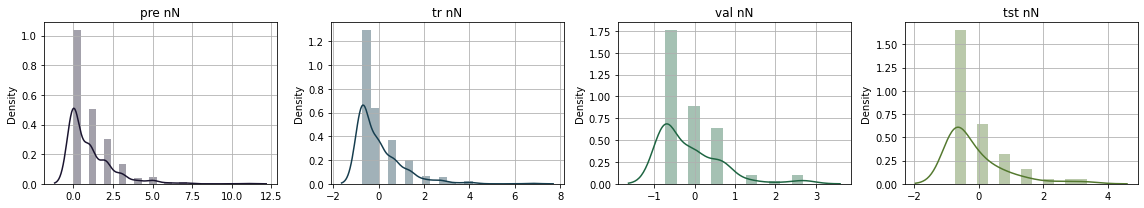

In [11]:
columns = {0:"TPSA", 1:"SAacc", 2:"H-050", 3:"MLOPG", 4:"RDCHI", 5:"GATS1p", 6:"nN",7:"C-050"}
titles = {
    0: "pre",
    1: "tr",
    2: "val",
    3: "tst"
}
for j in range(7): # <- completar
  vars=[np.asarray(x)[:,j],x_tr[:,j],x_val[:,j],x_test[:,j]]
  for k in range(4):
    plt.subplot(1,4,k+1)
    plt.title(titles[k] + " " + columns[j]) # <- completar
    sns.distplot(vars[k],color=cols[k]) # <- completar puede usar boxplot, histogramas u otra herramienta
    plt.tight_layout()
    plt.grid()
  plt.show()

### Comentarios

1. En los gráficos ploteados en la celda anterior podemos visualizar cómo el proceso de normalización contraresta la **asimetría** centrando los datos en 0.
2. Para data cuya distribución ya era bastante normalizada y ordenada, el proceso de estandarización no produce grandes beneficios, sin embargo, en el peor de los casos la estandarización no aporta nada, por lo que, siempre es conveniente aplicar estandarización a la data.
3. En gráficos como los de "Nn" podemos observar que las barras del histograma dejan "espacios vacíos". Esto se debe a la distribución de la data, a su concentración en valores y a la presencia de outliers.

##### V) **Pregunta:** ¿Por qué seleccionar los conjuntos de entrenamiento, validación y test _by hand_ es una mala práctica? ¿Qué beneficios _tramposos_ se pueden obtener de esta mala práctica?.

Al seleccionar los conjuntos by hand podríamos tender a distribuir los datos de forma **homogénea**, generando así conjuntos de entrenamiento, validación y testeo **similares**, por lo que, **no** podríamos estimar fielmente la capacidad de **generalización** del modelo entrenado. Si tenemos un conjunto de entrenamiento muy similar al de validación, podríamos **sobre ajustar** el modelo a los datos de entrenamiento y obtener muy buenos resultados en el conjunto de validación, esto sucede análogamente para los conjuntos de validación y testeo, sin embargo, estos buenos resultados **no** tendrían una buena **generalización** con un nuevo conjunto de datos de prueba.

##### VI) **Bonus:** Tome decisiones, p.ej realice transformaciones, manipulaciones, etc... de manera fundamentada que ayuden a mejorar la conformación de los conjuntos para el posterior entrenamiento de la red neuronal. Evite malas prácticas.

In [12]:
df2.isna().sum()

TPSA             0
SAacc            0
H-050            0
MLOPG            0
RDCHI            0
GATS1p           0
nN               0
C-050            0
LC50-response    0
dtype: int64

## 1.b Primera arquitectura

Partiremos cargando los paquetes necesarios. Conozcamos tensorflow y keras:

_TensorFlow_ es una librería de computación matemática, que ejecuta de forma rápida y eficiente gráficos de flujo. Un gráfico de flujo está formado por operaciones matemáticas representadas sobre nudos, y cuya entrada y salida es un vector multidimensional (o tensor) de datos. 

_Keras_ es una abstracción, un API High-level, para la creación de modelos de aprendizaje. Aporta una sintaxis homogénea y un interface sencillo, modular y ampliable para la creación de redes neurales.

Las redes neurales son un tipo particular de gráfico de flujo de datos. Por tanto, TensorFlow y Keras combinan perfectamente.

In [229]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from tensorflow.python.keras.engine import input_layer

##### I) Entrene la siguiente red neuronal de una capa con funciónes de activación sigmoidales, función de pérdida MSE, optimizador SGD, y learning rate=0.01 por 500 epochs. Este entrenamiento toma menos de 20 segundos en _Colab_ con entorno de ejecución TPU

In [231]:
from keras.optimizers import SGD
from keras.callbacks import History 

# Define architecture
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='sigmoid',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='sigmoid',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)]

# Train model
hist_1_b_i = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
#verbose=1 shows epoch per epoch evolution, not necessary if you are planning to plot hist

Note cómo se puede evaluar todo el conjunto de test en sólo un paso:

In [232]:
y_pred=model(x_test) # model.predict(x_test) returns numpy array
test_batch_loss=tf.keras.losses.MSE(y_test, y_pred)

Note cómo se obtiene el error MSE para cada observación en el conjunto de test. Se introdujo a propósito la notación batch para definir la variable python, esta dimensión debe ser siempre la primera dimensión del tensor cuando entrenamos redes neuronales. Un batch es un conjunto de observaciones, dado que estamos tratando con la evaluación del conjunto de test se utilizó un batch de tamaño máximo (igual a la cantidad de observaciones del conjunto de test).

In [233]:
test_batch_loss # error por cada testeo, no hace suma de los (y_pred-y_test)**2

<tf.Tensor: shape=(55,), dtype=float32, numpy=
array([5.10292590e-01, 3.45904052e-01, 1.43203235e+00, 4.58457693e-03,
       3.07209849e-01, 5.02225935e-01, 1.65303946e+00, 7.83043325e-01,
       3.08825076e-03, 5.91217470e+00, 4.07022722e-02, 5.65169990e-01,
       1.15341353e+00, 1.24557447e+00, 4.63925332e-01, 1.42599195e-01,
       1.05228448e+00, 1.96496740e-01, 9.56820697e-02, 1.54334813e-01,
       1.27366409e-01, 7.40267336e-02, 5.39917350e-01, 7.49813169e-02,
       2.26531237e-01, 3.44995081e-01, 1.04015544e-01, 2.90209723e+00,
       6.73750103e-01, 8.72639060e-01, 7.82272294e-02, 3.99681360e-01,
       3.42592925e-01, 9.18830872e-01, 1.63760558e-02, 1.01672718e-03,
       1.08385479e+00, 2.06851289e-01, 3.37391086e-02, 9.33270752e-01,
       2.65501380e-01, 5.07391119e+00, 2.01398626e-01, 7.94677089e-06,
       5.15093565e+00, 6.30493045e-01, 3.55609655e-01, 3.94045651e-01,
       1.00605214e+00, 1.64545551e-01, 2.90827560e+00, 1.17503941e+00,
       8.85257777e-03, 9.79298

Obtenga el error MSE promedio para todo el conjunto de test. **Aprecie** cómo se graficará el proceso de entrenamiento de la red neuronal, tendrá que repetir este proceso para reportar resultados múltiples veces durante el ramo. Utilizar verbose=1 para reportar resultados **NO ES VÁLIDO**, dado que es de difícil lectura y ocupa una cantidad de espacio innecesaria, se recomienda utilizar esta opción para estimar cuánto tiempo se demorará en entrenar la red viendo un par de epochs, luego se puede pausar el entrenamiento y desactivar el verbose para volver a entrenar. Esto no es obligatiorio y condicional de cuánto epochs se están entrenando, sin embargo considere que un entrenamiento por 1000 epochs puede ocupar el equivalente a 10 páginas pdfs, lo que dificultará la navegación por el archivo, pues no siempre es posible plegar el output de una celda (depende de cómo se está visualizando el archivo, p.ej al ver un notebook por github no se podrán plegar los outputs). **Comente** el gráfico generado, **Preguntas:** ¿existe overfitting? **¿Qué conclusiones puede sacar al observar el error del conjunto de test y compararlo respecto al conjunto de entrenamiento y validación?**

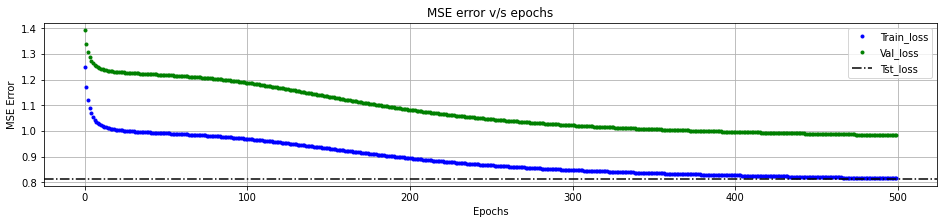

In [234]:
plt.rcParams["figure.figsize"]=[16,3]
test_loss_1_b_i=tf.math.reduce_mean(test_batch_loss).numpy() # .numpy() converts tensor to array, tf.convert_to_tensor converts array to tensor
plt.title("MSE error v/s epochs")
plt.plot(hist_1_b_i.history["loss"],"b.",label="Train_loss")
plt.plot(hist_1_b_i.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=test_loss_1_b_i,color="k",linestyle="-.",label="Tst_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

### Respuesta
Basándonos en el gráfico recién obtenido podemos concluir que **no existe overfitting** pues el error tanto en el training como en validation set disminuye de la misma forma. Por otro lado, no se observa el clásico efecto del overfitting en el cual el error en el training set sigue disminuyendo mientras el del validation set comienza a aumentar.

Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [18]:
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[False, False, False, False]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [19]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[True, True, True, True]

---> Procederemos a guardar el modelo

In [20]:
import sys
sys.path.append('saved_model')

In [21]:
model.save('saved_model/1_b_i')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1_b_i/assets


---> Verificamos

In [22]:

model_new=tf.keras.models.load_model('saved_model/1_b_i/') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

[True, True, True, True]

##### II) **Entrene** una red neuronal con los mismos hiperparámetros que en la sección anterior pero con función de activación ReLU.

In [235]:
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
model2=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model2.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error') # Stochastic gradient descent
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 

hist_1_b_ii = model2.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
test_loss_1_b_ii=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model2(x_test))).numpy()

y_pred_ii = model2(x_test) # model.predict(x_test) returns numpy array
test_batch_loss=tf.keras.losses.MSE(y_test, y_pred_ii) # notar el _ii 
test_loss_1_b_ii =tf.math.reduce_mean(test_batch_loss).numpy()

##### III) **Cree** una función que grafique los resultados, puede basarse en el siguiente código. La función creada la puede ir modificando en los siguientes items para reducir esfuerzos (fijarse en que la visualización sea lo más clara posible). **Visualice y compare** los resultados con los obtenidos en el punto 1.b.I). **Comente**.

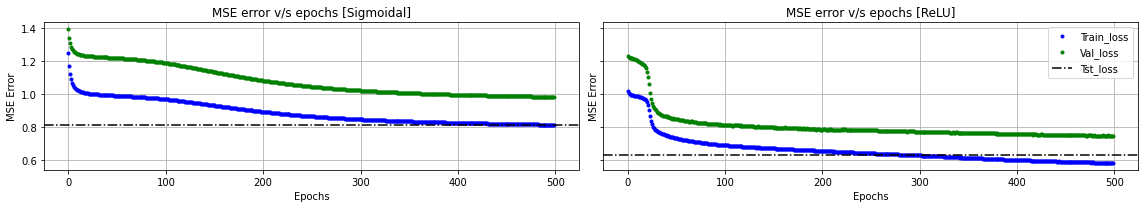

In [236]:
plt.rcParams["figure.figsize"]=[16,3]
hists=[hist_1_b_i.history,hist_1_b_ii.history]
tsts=[test_loss_1_b_i,test_loss_1_b_ii]
titles=["MSE error v/s epochs [Sigmoidal]","MSE error v/s epochs [ReLU]"]
def graph_results(hists,tsts,titles):
  fig, axes = plt.subplots(1, len(hists), sharey=True) # sharey to keep the same y lims for all subplots. 
                                            # En algunos casos esto puede jugar en contra para una buena visualización -> ver siguiente comentario
  for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.plot(hists[i]["loss"],"b.",label="Train_loss")
    ax.plot(hists[i]["val_loss"],"g.",label="Val_loss")
    ax.axhline(y=tsts[i],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel("MSE Error")
    # ax.set_ylim([ym,YM])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
    if i==len(axes)-1: ax.legend()
    ax.grid()
  plt.tight_layout()
  plt.show()

graph_results(hists,tsts,titles) # llamado simple para graficar

### Respuesta
Primero que todo notamos una disminución en el error cuando utilizamos como función de activación la ReLu. Al inicio podemos observar que con la función de activación ReLu el aprendizaje es más rápido, sin embargo en epochs posteriores (> 150) el error disminuye de manera similar para ambos gráficos.

## 1.c Sensibilidad a hiperparámetros

##### I) **Utilice** la siguiente función (o implemente una propia) para **recopilar** el error de entrenamiento, validación y test **según** el número de capas en la red neuronal y el número de neuronas. Considere el mismo número de neuronas para cada capa. Seleccione dos valores para la cantidad de neuronas entre 10 y 100, y varíe la profundidad entre 1 y 3, e.d 6 redes en total. Utilice la f° de activación ReLU, 500 epochs, lr=0.01, y error MSE. **Encuentre los hiperparámetros (n° neuronas y profundidad) que obtienen el menor error de validación**. 

**Pregunta:** ¿Por qué el menor error de validación y no de test?

**Visualice** y **Comente** los resultados.

### Respuesta
Para ajustar los hiperparámetros utilizamos el conjunto de validación, análogamente a cuando variamos los pesos de las neuronas para ajustar los datos de entrenamiento. Al igual que el conjunto de validación nos sirve para verificar la capacidad de generalización de nuestros ajuste de pesos, necesitamos el conjunto de testeo para validar que el "entrenamiento" de hiperparámetros tenga una buena capacidad de generalización a nueva data. Por lo tanto no tiene sentido buscar minimizar el error en el test set porque si lo hacemos estariamos utilizando el test set como validation set.

In [237]:
def train_network_1_c_i(prof_dense,n_neurons):
  input_dense=input_layer.Input(shape=(x_tr.shape[1]))
  for i in range(prof_dense):
    if i==0:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(input_dense)
    else:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  # Compile model
  model.compile(optimizer=SGD(learning_rate=0.001),loss='mean_squared_error')
  # define callbacks (keep patience at 100)
  my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] # Returns best validation loss
  # Train model
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

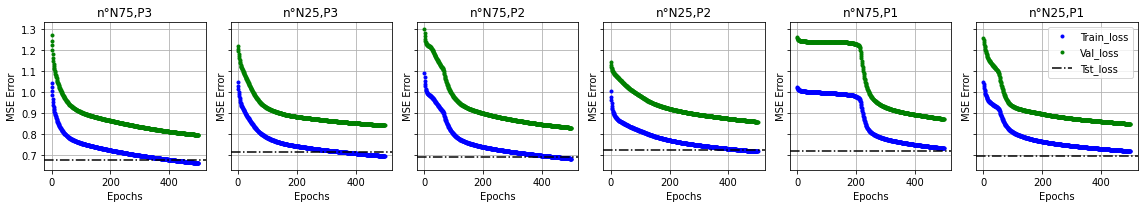

In [238]:
# (3,100) -> val = 1.25, 0.8,  train = 1.01, 0.7, test = 0.79
# (3,10) -> val = 1.4, 1, train = 1.1, 0.9, test = 1.05
# 3 layers, con 100 neuronas obtenemos un resultado mucho mejor que con 10 neuronas

h1,t1=train_network_1_c_i(3,75)
min_val_loss_1=np.min(h1.history["val_loss"])

h2,t2=train_network_1_c_i(3,25)
min_val_loss_2=np.min(h2.history["val_loss"]) #qwe

h3,t3=train_network_1_c_i(2,75)
min_val_loss_3=np.min(h3.history["val_loss"])

h4,t4=train_network_1_c_i(2,25)
min_val_loss_4=np.min(h4.history["val_loss"])

h5,t5=train_network_1_c_i(1,75)
min_val_loss_5=np.min(h5.history["val_loss"]) #ddd

h6,t6=train_network_1_c_i(1,25)
min_val_loss_6=np.min(h6.history["val_loss"])

plt.rcParams["figure.figsize"]=[16,3]
graph_results([h1.history,h2.history, h3.history, h4.history, h5.history, h6.history],[t1,t2,t3,t4,t5,t6],["n°N75,P3","n°N25,P3","n°N75,P2", "n°N25,P2", "n°N75,P1", "n°N25,P1"])

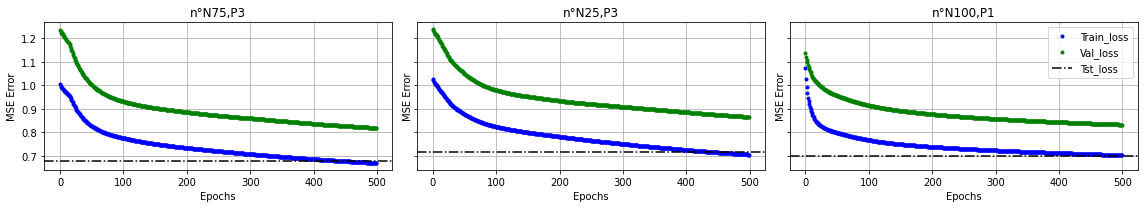

In [239]:

h1,t1=train_network_1_c_i(3,75) #asd
min_val_loss_1=np.min(h1.history["val_loss"])

h2,t2=train_network_1_c_i(3,25) #qwe
min_val_loss_2=np.min(h2.history["val_loss"]) 

h5,t5=train_network_1_c_i(1,100) ### ddd
min_val_loss_5=np.min(h5.history["val_loss"])

graph_results([h1.history,h2.history, h5.history],[t1,t2,t5],["n°N75,P3","n°N25,P3","n°N100,P1"])

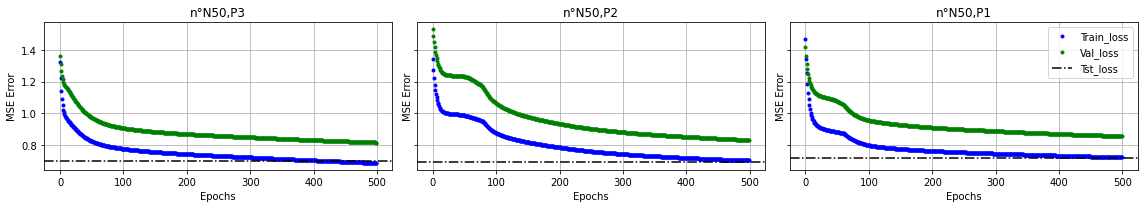

In [240]:

h1,t1=train_network_1_c_i(3,50) #asd
min_val_loss_1=np.min(h1.history["val_loss"])

h2,t2=train_network_1_c_i(2,50) #qwe
min_val_loss_2=np.min(h2.history["val_loss"]) 

h5,t5=train_network_1_c_i(1,50) ### ddd
min_val_loss_5=np.min(h5.history["val_loss"])

graph_results([h1.history,h2.history, h5.history],[t1,t2,t5],["n°N50,P3","n°N50,P2","n°N50,P1"])

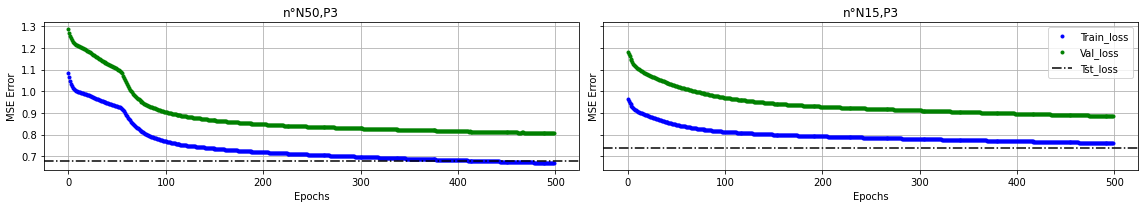

In [249]:
h1,t1=train_network_1_c_i(3,50) #asd
min_val_loss_1=np.min(h1.history["val_loss"])

h2,t2=train_network_1_c_i(3,15) #qwe
min_val_loss_2=np.min(h2.history["val_loss"]) 
graph_results([h1.history, h2.history],[t1, t2],["n°N50,P3", "n°N15,P3"])

### Análisis
Notamos que con poca profundidad y pocas neuronas no se logra ajustar correctamente el conjunto de validación. En general, los patrones de los datos son suficientemente complejos como para ajustar una red con 3 capas de profundidad y un número de neuronas mayor a 25 y menor a 75, ya que, una complejidad mayor no disminiye el error en conjunto de validación. Además, el hecho de utilizar SGD dificulta un poco el análisis, ya que, por cada reejecución provoca leves variaciones en las gráficas.

##### II) **Realice** un experimento similar, ahora variando el learning rate entre [-1e-6 y 1e-1], entrene 6 redes neuronales con distintos learning rate. Para esto **implemente una función** semejante a la utilizada en el punto anterior, use la arquitectura e hiperparámetros dados. **Encuentre el learning rate que obtiene el menor error de validación. Visualizar y comentar**

In [251]:
def train_network_2_c_i(lr):
    input_dense= input_layer.Input(shape=(x_tr.shape[1]))
    dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
    dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    model.compile(optimizer=SGD(learning_rate= lr),loss='mean_squared_error')
    my_callbacks = [History(), # Returns validation and training loss
        tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                         restore_best_weights=True)]
    hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
    test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
    return(hist,test_loss)

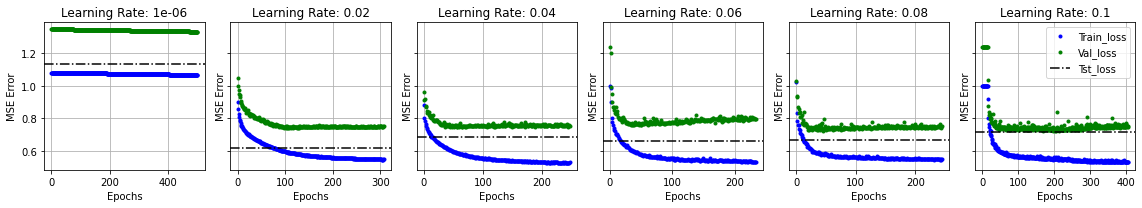

In [252]:
histories = []
test_losses = []
titles = []
for i in np.linspace(1e-6,1e-1,6):
    h,t=train_network_2_c_i(i) #qwe
    histories.append(h.history)
    test_losses.append(t)
    if(i==1e-6):
        titles.append(f'Learning Rate: {i}')
    else:
        titles.append(f'Learning Rate: {np.round(i,2)}')

graph_results(histories,test_losses,titles)

# Análisis
Desde un learning rate 0.02 hasta 0.08 podemos visualizar un **sobreajuste** pues el error en el training set mantiene su decrecimiento mientras que el error en el validation set comienza a aumentar. Un caso de interés es el learning rate 1e-06 pues al utilizar este valor el aprendizaje es muy lento, sin embargo no genera un overfitting. Dentro de los gráficos con overftting notamos que el mejor es aquel con learning rate 0.02; el aprendizaje es muy rápido, se obtienen bajos errores y si bien hay overfitting, es poco en comparación a los otros modelos.

##### III) **Realice** un experimento similar, ahora variando el learning decay, entrene 6 redes neuronales para distintos decay. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Encuentre el learning decay que obtiene el menor error de validación. Visualizar y comentar**

In [254]:
lear_decay = np.logspace(-6,0,6)
lear_decay=np.around(lear_decay,decimals=6)


def train_network_3_c_i(decay):
    input_dense= input_layer.Input(shape=(x_tr.shape[1]))
    dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
    dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    model.compile(optimizer=SGD(learning_rate=0.01,decay= decay),loss='mean_squared_error')

    my_callbacks = [History(), # Returns validation and training loss
        tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                         restore_best_weights=True)]
    hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
    test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()

    return(hist,test_loss)

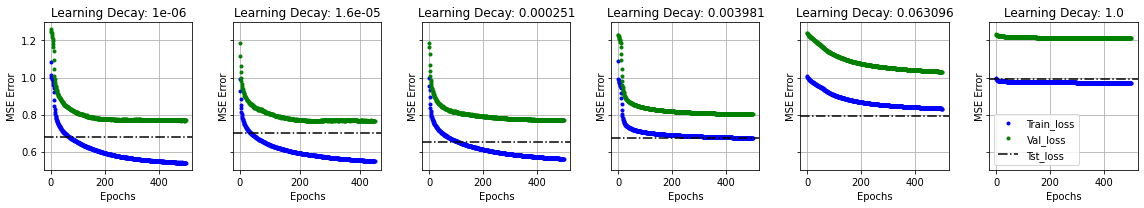

In [258]:
histories = []
test_losses = []
titles = []
lear_decay = np.logspace(-6,0,6)
lear_decay=np.around(lear_decay,decimals=6)
for i in lear_decay:
    h,t=train_network_3_c_i(i) #qwe
    histories.append(h.history)
    test_losses.append(t)
    titles.append(f'Learning Decay: {i}')

graph_results(histories,test_losses,titles)

### Respuesta

Concluímos que el learning decay que nos entrega el menor error de validación es 0.000251.

Notar que para los dos learning decay mayores el aprendizaje es bastante lento. En particular para el learning decay 1.0, el learning rate disminuye considerablemente desde un principio, por lo que, el aprendizaje se vuelve extremadamente lento, sobre todo tomando en cuenta que el Learning rate inicial es 0.01, esto se observa al llevar 500 Epochs y aún así se logra una mínima disminución de error.

## Análisis

##### IV) **Realice** un experimento similar, ahora variando el optimizador para la arquitectura e hiperparámetros dados, pruebe con los optimizadores [SGD, Adagrad, Adadelta, Adam y RMSprop]. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Pregunta:** ¿En qué optimizadores no tiene sentido utilizar el learning decay, por qué? **Visualizar y comentar**

### Respuesta
En Adagrad, Adadelta, Adam y RMSprop no tiene sentido utilizar learning decay ya que, en estos ya se implementa una variación al learning rate en cada iteración, por otro lado, la formulación de SGD no contempla una fórmula exacta para calcular una variación del learning decay, por lo que, es nuestra tarea encontrar el hiperparámetro más adecuado. 

In [34]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

def train_network_4_c_i(optimizer):
    input_dense= input_layer.Input(shape=(x_tr.shape[1]))
    dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
    dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    model.compile(optimizer=optimizer(learning_rate=0.001),loss='mean_squared_error')
    # Define callbacks
    my_callbacks = [History(), 
        tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                         restore_best_weights=True)]
    hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
    test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()

    return(hist,test_loss)

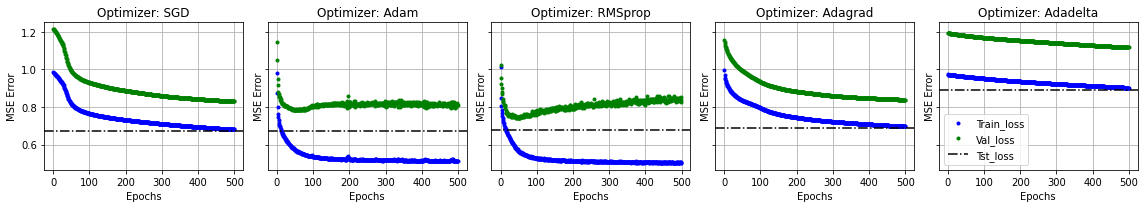

In [35]:
histories = []
test_losses = []
titles = []
functions = [SGD, Adam, RMSprop, Adagrad, Adadelta]
for i in functions:
    h,t=train_network_4_c_i(i) #qwe
    histories.append(h.history)
    test_losses.append(t)
    titles.append(f'Optimizer: {i.__name__}')

graph_results(histories,test_losses,titles)

### Análisis
Notamos que para SGD en cada epoch la capacidad de generalización mejora lenta y continuamente. Para Adam y RMSprop el aprendizaje es muy rápido pero desde la epoch 50 aproximadamente se hace visible el overfitting, notar que si hicieramos uso de un early stopping adecuado obtendríamos mejores resultados que SGD. Por otro lado Adragad presenta un aprendizaje rápido para las primeras 50 epochs aproximadamente y luego comienza a generalizar lentamente al igual que SGD. Finalmente Adadelta presenta un gráfico interesante en donde si bien el error parte en valores muy altos, la pendiente nos hace pensar que para un mayor número de epochs se podrían encontrar errores bajos.

##### V) **Realice** un expermiento similar, ahora variando el batch_size entre 1 y x_tr.shape[0] incluyendo los extremos. Entrene 6 redes neuronales con la arquitectura e hiperparámetros dados. Para esto **implemente una función** semejante a la utilizada en el punto anterior. Para un batch_size=1 el entrenamiento se va a demorar más que en puntos anteriores, aprox. 1 segundo en _Colab_. **Visualizar y comentar**. **Preguntas:** ¿A qué es equivalente entrenar con un batch_size = 1 y batch_size=x_tr.shape[0]? ¿Cuál es el batch_size por default?

### Respuesta

Entrenar con un batch_size = 1 es equivalente entrenar con SGD pues solo se tomará **un dato al azar en cada iteración**. Por otro lado si tomamos un batch_size de tamaño x_tr.shape[0] tomaremos **solamente un batch (lote)** estaremos usando el clásico BGD. El batch size por default es 32.

In [36]:
n_batches=6
batches=np.round(np.linspace(1,x_tr.shape[0],n_batches))

def train_network_5_c_i(batch_size):
    input_dense= input_layer.Input(shape=(x_tr.shape[1]))
    dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
    dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
    # Define callbacks
    my_callbacks = [History(), 
        tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                         restore_best_weights=True)]
    hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=int(batch_size),validation_data=(x_val, y_val),callbacks=my_callbacks)
    test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()

    return(hist,test_loss)

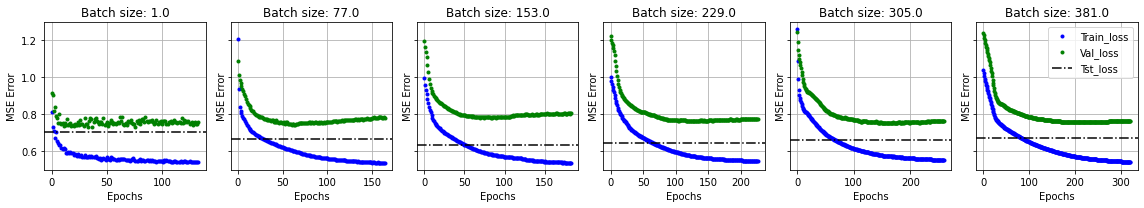

In [37]:
histories = []
test_losses = []
titles = []
for i in batches:
    h,t=train_network_5_c_i(i) #qwe
    histories.append(h.history)
    test_losses.append(t)
    titles.append(f'Batch size: {i}')

graph_results(histories,test_losses,titles)

## 1.d Inicializaciones, pesos y gradientes

##### I) Utilizando las siguientes arquitecturas proceda a graficar la distribución de pesos de las distintas capas bajo inicialización uniforme (incluyendo bias). Adicionalmente calcule el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente del error de todos los datos de entrenamiento) respecto a los pesos en las distintas capas. **Visualize, compare y comente**

In [38]:
# Define architecture (1)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
model_1=models.Model(inputs=input_dense, outputs=output_dense)

# Define architecture (2)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model_2=models.Model(inputs=input_dense, outputs=output_dense)

# Get weights
weights_1=model_1.get_weights()
weights_2=model_2.get_weights()

# Get gradient
with tf.GradientTape() as tape:
  y_pred_1 = model_1(x_tr)
  loss_1 = tf.reduce_mean(tf.square(y_pred_1-y_tr)) #MSE loss  (mean squared loss)
  grad_1=tape.gradient(loss_1,model_1.trainable_weights) 

with tf.GradientTape() as tape:
  y_pred_2 = model_2(x_tr)
  loss_2 = tf.reduce_mean(tf.square(y_pred_2-y_tr)) #MSE loss  (mean squared loss)
  grad_2=tape.gradient(loss_2,model_2.trainable_weights)
 # gradient only calculated, if u want to apply it to update weights the model must have an optimizer, for example set model.optimizer=tf.keras.optimizers.Adam(lr) 
# and then use: model.optimizer.apply_gradients(zip(grad, model.trainable_variables)) to update weights. Equivalent to an epoch of maximum batch size (all training set) in this code
# model.compile and model.fit does this, with extra implementations, like variable batch size,
# so it's not necessary to do it manually in this case. If u pay attention to the code all the flow of information is in the form
# of tensors. This setup can be necessary in the case that u want to implement a custom loss that use exogenous variables to compute the loss, other than only y_pred and y_true
# for the best of my knowledge u can define a custom loss to use in model.compile and model.fit, but only if u are using this two variables (y_true,y_pred),
# exogenous variables are not supported

# As example, if u want to define a mean quintic error loss, only using y_pred and y_true and want to keep all the cool functionalities, as callbacks, from model.compile
# and model.fit:
# def custom_loss(y_true,y_pred):
#   return(tf.reduce_mean(tf.math.pow(y_true-y_pred,5)))
# model.compile (optimizer='rmsprop',loss="custom_loss")
# model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=?,validation_data=(x_val, y_val),callbacks=my_callbacks)

In [39]:
#print(f'El gradiente para la arquitectura 1 es: {grad_1}')
print(f'El valor de pérdida para la arquitectura 1 es: {loss_1}')
#print(f'El gradiente para la arquitectura 2 es: {grad_2}')
print(f'El valor de pérdida para la arquitectura 2 es: {loss_2}')

El valor de pérdida para la arquitectura 1 es: 1.0001463890075684
El valor de pérdida para la arquitectura 2 es: 0.9999997615814209


In [40]:
# To understand where are the weights and number of weights:
model_1.summary()

Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_118 (Dense)            (None, 100)               900       
_________________________________________________________________
dense_119 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_120 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_121 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 101       
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________

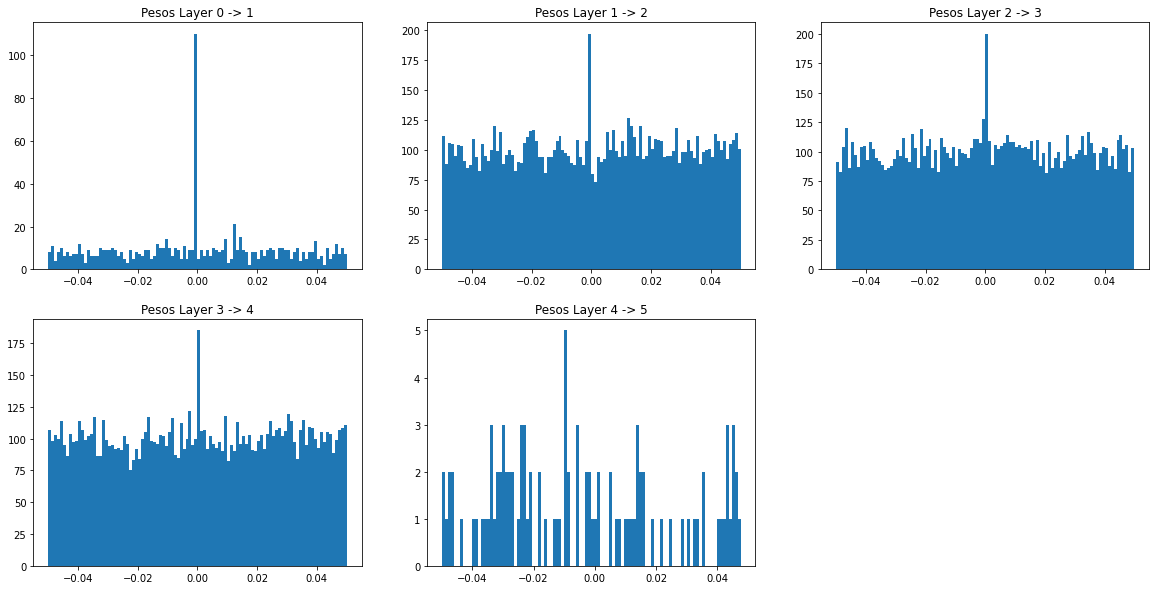

In [41]:
# pesos arquitectura 1
plt.rcParams["figure.figsize"]=[20,10]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(2,3,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_1[i].reshape((weights_1[i].shape[0]*weights_1[i].shape[1])),weights_1[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos Layer {j} -> {j  + 1}')
    
plt.show()

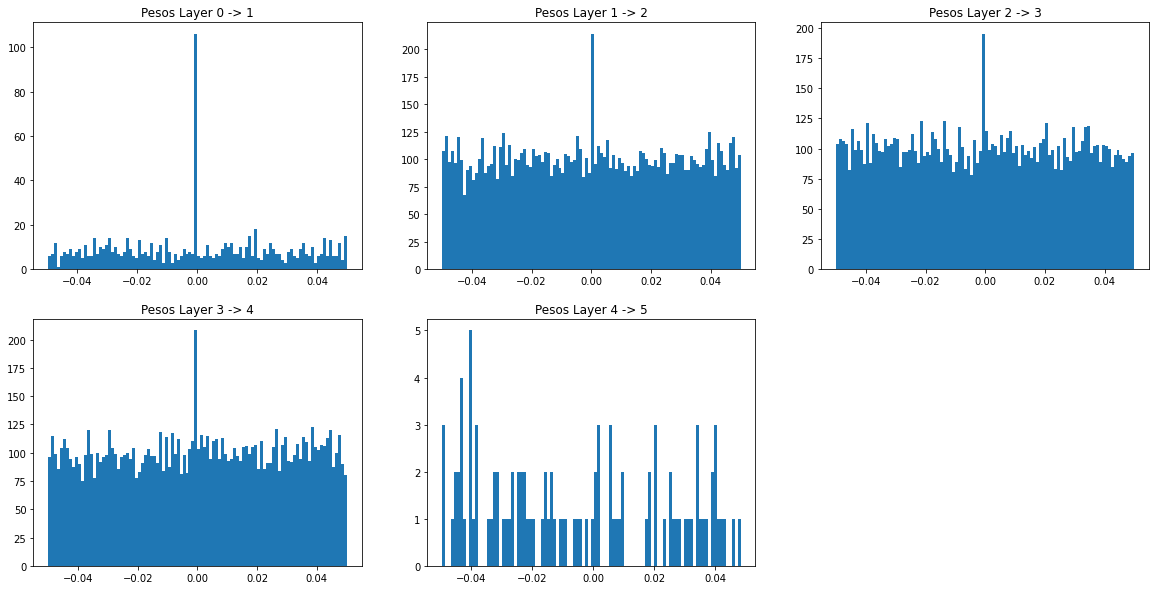

In [42]:
#pesos arquitectura 2
plt.rcParams["figure.figsize"]=[20,10]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(2,3,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_2[i].reshape((weights_2[i].shape[0]*weights_2[i].shape[1])),weights_2[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos Layer {j} -> {j  + 1}')
    
plt.show()

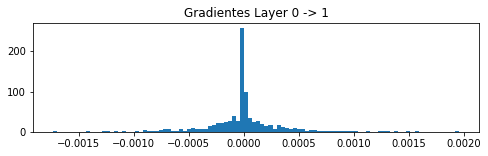

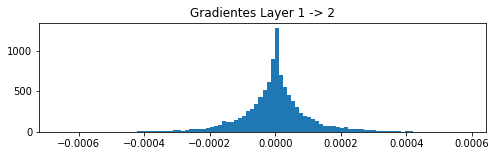

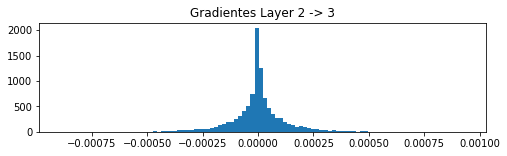

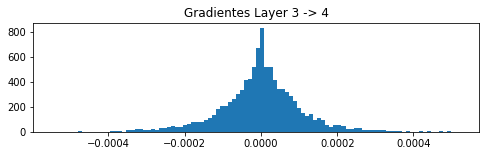

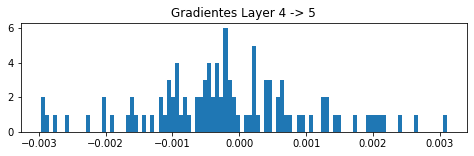

In [43]:
# gradientes arquitectura 1
plt.rcParams["figure.figsize"]=[8,2]
for j,layer in enumerate(model_1.layers[1:]):
    with tf.GradientTape() as tape:
        y_pred = model_1(x_tr)
        loss = tf.reduce_mean(tf.square(y_pred - y_tr))
        grad = tape.gradient(loss, layer.trainable_weights)
        grad_weights, grad_bias = grad
        aux = list()
        for neuron in grad_weights:
          aux = np.concatenate((aux, neuron))
        aux = np.concatenate((aux, grad_bias))
        plt.hist(aux ,bins=100)
        plt.title(f'Gradientes Layer {j} -> {j  + 1}')
        plt.show()

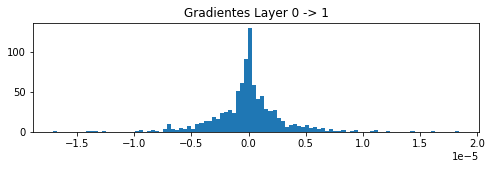

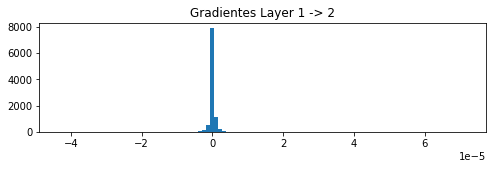

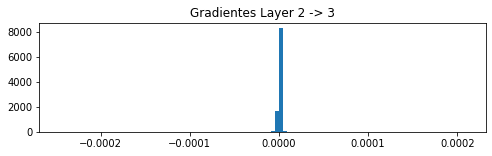

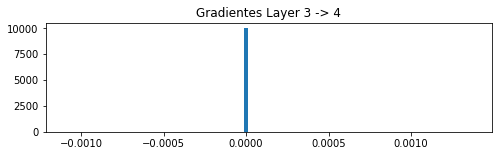

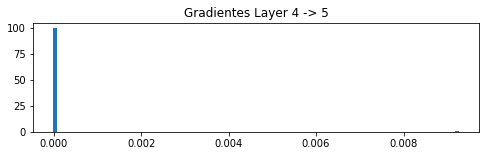

In [44]:
# gradientes arquitectura 2
plt.rcParams["figure.figsize"]=[8,2]
for j,layer in enumerate(model_2.layers[1:]):
    with tf.GradientTape() as tape:
        y_pred = model_2(x_tr)
        loss = tf.reduce_mean(tf.square(y_pred - y_tr))
        grad = tape.gradient(loss, layer.trainable_weights)
        grad_weights, grad_bias = grad
        aux = list()
        for neuron in grad_weights:
          aux = np.concatenate((aux, neuron))
        aux = np.concatenate((aux, grad_bias))
        plt.hist(aux ,bins=100)
        plt.title(f'Gradientes Layer {j} -> {j  + 1}')
        plt.show()

### Análisis

Se observa que a pesar de utilizar inicialización uniforme los pesos no se visualizan con una distribución uniforme perfecta, sin embargo, es bastante cercana a una uniforme, además, notamos que al aumentar el número de bins la visualización es cada vez más precisa, esto ya que, la distribución uniforme es del tipo continua, por lo que, mientras más pequeños sean nuestros rangos de clasificación del histograma, estaremos emulando de forma más precisa el conjunto de los reales. Podemos mencionar además que los pesos inicializados no dependen de la función de activación. En la distribución la frecuencia para el peso 0 destaca por sobre las otras por los pesos de las neuronas bias de cada capa. Adicionalmente, cada vez que se inicializan los pesos estos son distintos, por lo que, hay un proceso aleatorio para su inicialización pero respetando la uniformidad de la distribución.

Respecto a los gradientes, notamos que estos están distribuidos casi normalmente para la primera capa. Sin embargo para las capas posteriores estos se centran en 0.

##### II) Repita el experimento para las inicializaciones de kernel HE_uniform, Glorot normal y Glorot uniform. **Visualice, comente, y compare** 

**Pregunta** ¿Es posible inicializar los bias? ¿Cómo sería el código?

### Respuesta

Sí es posible. Estos se pueden inicializar de forma distinta para cada capa por lo que se añaden como parámetro cuando se definen las capas utilizando layers.Dense. Como ejemplo, podemos inicializar los bias de la primera hidden layer de manera uniforme con el siguiente código:

``dense=layers.Dense(100, activation='tanh',use_bias=True, bias_initializer='uniform', kernel_initializer="he_uniform")(input_dense)``

In [396]:
# Define architecture (1)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="he_uniform")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="he_uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="he_uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="he_uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="he_uniform")(dense)
model_1=models.Model(inputs=input_dense, outputs=output_dense)

# Define architecture (2)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
model_2=models.Model(inputs=input_dense, outputs=output_dense)

# Define architecture (3)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_uniform")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="glorot_uniform")(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="glorot_uniform")(dense)
model_3=models.Model(inputs=input_dense, outputs=output_dense)

# Get weights
weights_1=model_1.get_weights()
weights_2=model_2.get_weights()
weights_3=model_3.get_weights()


# Get gradient
with tf.GradientTape() as tape:
  y_pred_1 = model_1(x_tr)
  loss_1 = tf.reduce_mean(tf.square(y_pred_1-y_tr)) #MSE loss  (mean squared loss)
  grad_1=tape.gradient(loss_1,model_1.trainable_weights) 

with tf.GradientTape() as tape:
  y_pred_2 = model_2(x_tr)
  loss_2 = tf.reduce_mean(tf.square(y_pred_2-y_tr)) #MSE loss  (mean squared loss)
  grad_2=tape.gradient(loss_2,model_2.trainable_weights)
with tf.GradientTape() as tape:
  y_pred_3 = model_3(x_tr)
  loss_3 = tf.reduce_mean(tf.square(y_pred_3-y_tr)) #MSE loss  (mean squared loss)
  grad_3=tape.gradient(loss_3,model_3.trainable_weights)

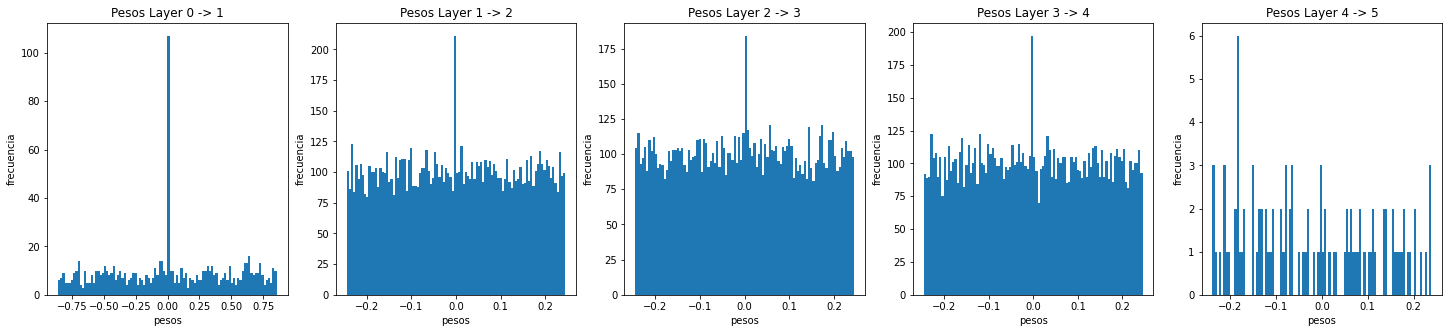

In [397]:
# he_uniform
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_1[i].reshape((weights_1[i].shape[0]*weights_1[i].shape[1])),weights_1[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
    plt.title(f'Pesos Layer {j} -> {j  + 1}')
    

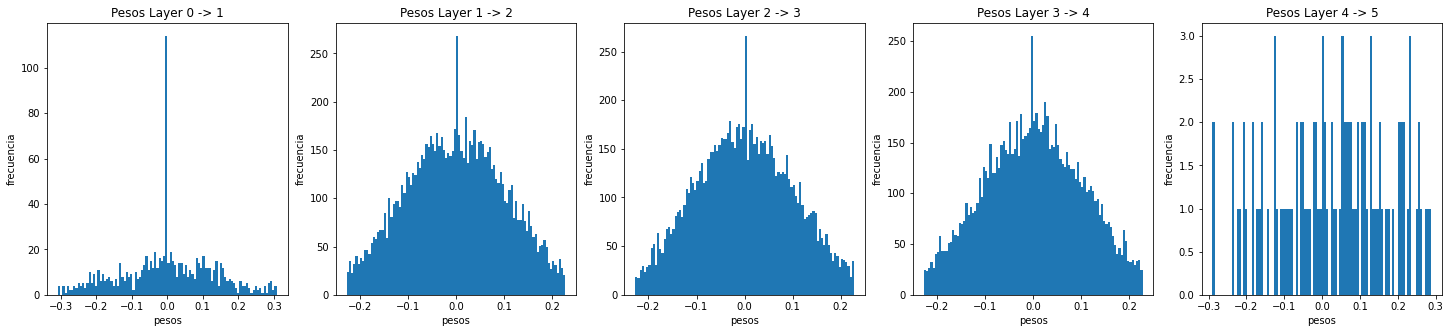

In [398]:
# glorot_normal
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_2[i].reshape((weights_2[i].shape[0]*weights_2[i].shape[1])),weights_2[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
    plt.title(f'Pesos Layer {j} -> {j  + 1}')
    
plt.show()

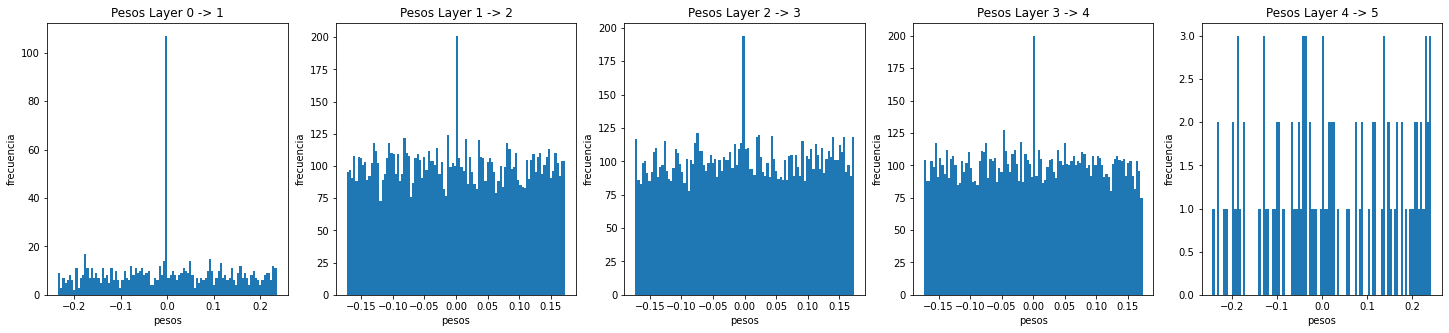

In [399]:
# Glorot uniform
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_3[i].reshape((weights_3[i].shape[0]*weights_3[i].shape[1])),weights_3[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos Layer {j} -> {j  + 1}')
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
    
plt.show()

### Análisis

Realizamos el análisis con una red con función de activación ReLu, no es necesario analizar la otra arquitectura con función de activación tanh pues la inicialización no depende de esta. Analizando los gráficos obtenidos notamos que no existe gran diferencia entre el HE y el Glorot uniform. Por otro lado al utilizar el inicializador glorot normal observamos que los pesos están distribuidos de forma normal, es decir se concentran en la media. Adicionalmente se investigó, y se recomienda utilizar inicialización HE Uniforme cuando se tiene un modelo con ReLu e inicialización Glorot uniform cuando se tiene un modelo con sigmoid o tanh. En la mayoría de los casos las inicializaciones uniformes logran un mejor rendimiento que las normales.

##### III) Utilizando las arquitecturas siguientes. **Recolecte** los pesos y gradientes al inicializar, **entrene** la red neuronal, y **recolecte** nuevamente los pesos y gradientes, junto a los errores de entrenamiento, validación y test. (En la medida de lo posible!). **Visualice, compare y comente**. Ciertos conceptos ya debiesen salir a colación para explicar lo que está sucediendo.

In [450]:
# 1st arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='linear',use_bias=True, kernel_initializer="uniform")(dense)
model_1=models.Model(inputs=input_dense, outputs=output_dense)

# 2nd arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(1000, activation='sigmoid',use_bias=False, kernel_initializer="he_uniform")(input_dense)
output_dense=layers.Dense(1, activation='linear',use_bias=False, kernel_initializer="uniform")(dense)
model_2=models.Model(inputs=input_dense, outputs=output_dense)

# Get initial weights
weights_ini_1 =model_1.get_weights()
weights_ini_2 =model_2.get_weights()

# Get initial gradient
with tf.GradientTape() as tape:
  y_pred_ini_1 = model_1(x_tr)
  loss_ini_1 = tf.reduce_mean(tf.square(y_pred_ini_1 - y_tr)) #MSE loss  (mean squared loss)
  grad_ini_1 =tape.gradient(loss_ini_1,model_1.trainable_weights) 

with tf.GradientTape() as tape:
  y_pred_ini_2 = model_2(x_tr)
  loss_ini_2   = tf.reduce_mean(tf.square(y_pred_ini_2 - y_tr)) #MSE loss  (mean squared loss)
  grad_ini_2   = tape.gradient(loss_ini_2,model_2.trainable_weights) 

# Compile model
model_1.compile(optimizer=SGD(learning_rate=0.001),loss='mean_squared_error') # learning rate original 0.01, valor alternativo 0.0001
model_2.compile(optimizer=SGD(learning_rate=0.001),loss='mean_squared_error') # learning rate original 0.01, valor alternativo 0.0001
# Train model
hist1 = model_1.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback
hist2 = model_2.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback


# Get final weights
weights_fin_1 = model_1.get_weights()
weights_fin_2 = model_2.get_weights()

# Get final gradient
with tf.GradientTape() as tape:
  y_pred_fin_1 = model_1(x_tr)
  loss_fin_1 = tf.reduce_mean(tf.square(y_pred_fin_1-y_tr)) #MSE loss  (mean squared loss)
  grad_fin_1=tape.gradient(loss_fin_1,model_1.trainable_weights) 

with tf.GradientTape() as tape:
  y_pred_fin_2 = model_2(x_tr)
  loss_fin_2 = tf.reduce_mean(tf.square(y_pred_fin_2-y_tr)) #MSE loss  (mean squared loss)
  grad_fin_2=tape.gradient(loss_fin_2,model_2.trainable_weights) 

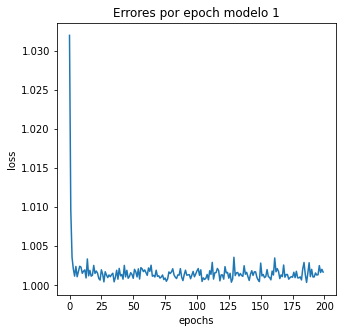

In [451]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("Errores por epoch modelo 1")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.plot(hist1.history["loss"])
plt.show()

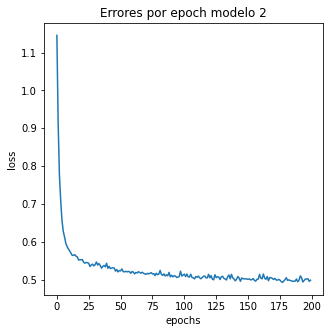

In [452]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("Errores por epoch modelo 2")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.plot(hist2.history["loss"]) # Visible divergencia
plt.show()

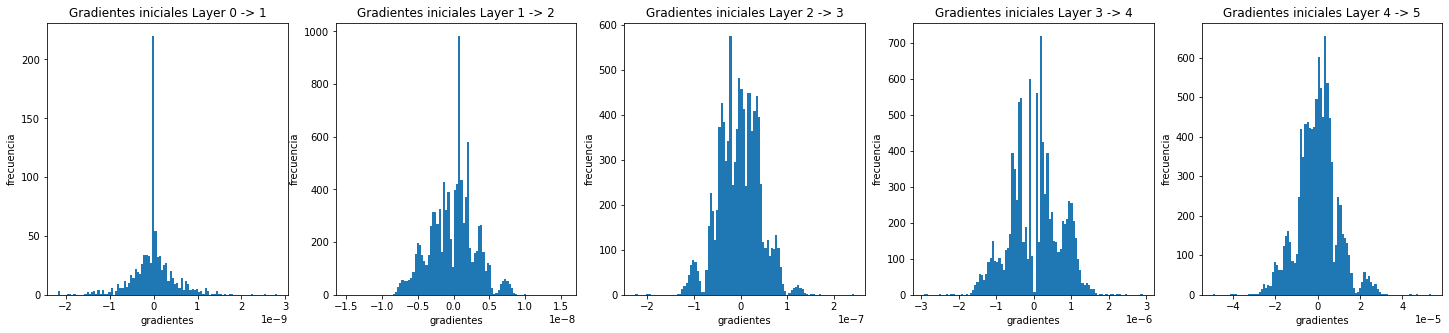

In [453]:
# Gradients ini 1
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    aux = np.append(np.reshape(grad_ini_1[i],(grad_ini_1[i].shape[0]*grad_ini_1[i].shape[1])),grad_ini_1[i+1])
    plt.hist(aux ,bins=100)
    plt.title(f'Gradientes iniciales Layer {j} -> {j  + 1}')

    plt.xlabel("gradientes")
    plt.ylabel("frecuencia")

plt.show() #and weights!!!!

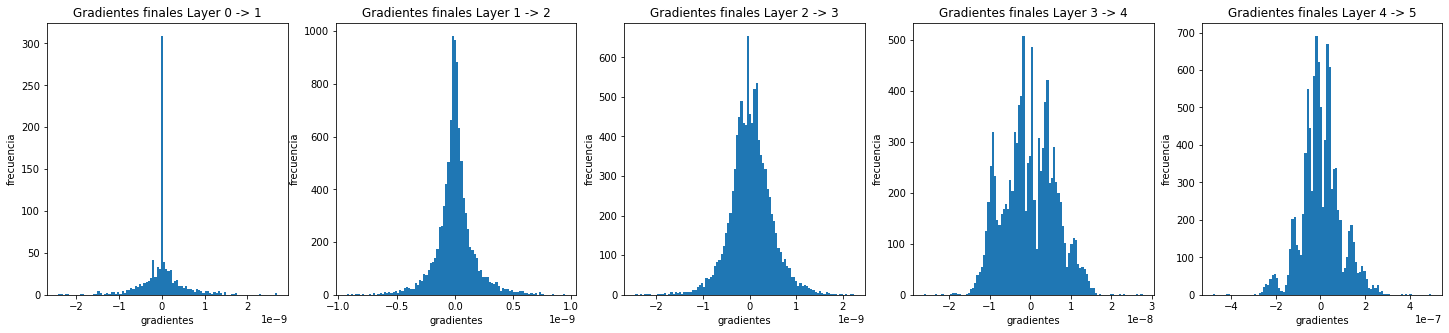

In [454]:
# Gradients fin 1
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    aux = np.append(np.reshape(grad_fin_1[i],(grad_fin_1[i].shape[0]*grad_fin_1[i].shape[1])),grad_fin_1[i+1])
    plt.hist(aux ,bins=100)
    plt.title(f'Gradientes finales Layer {j} -> {j  + 1}')
    plt.xlabel("gradientes")
    plt.ylabel("frecuencia")
plt.show() #and weights!!!!

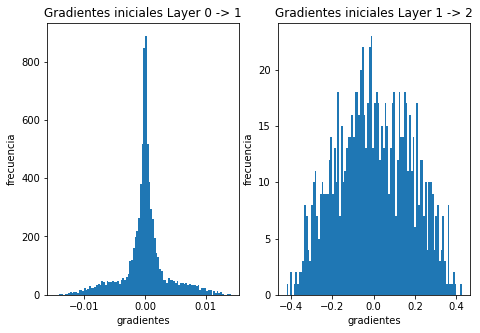

In [455]:
# Gradients ini 2
plt.rcParams["figure.figsize"]=[20,5]
for j, i in enumerate(np.arange(0,2)):
    plt.subplot(1,5,j + 1)
    aux = np.reshape(grad_ini_2[i],(grad_ini_2[i].shape[0]*grad_ini_2[i].shape[1]))
    plt.hist(aux ,bins=100)
    plt.title(f'Gradientes iniciales Layer {j} -> {j  + 1}')
    plt.xlabel("gradientes")
    plt.ylabel("frecuencia")
plt.show() #and weights!!!!

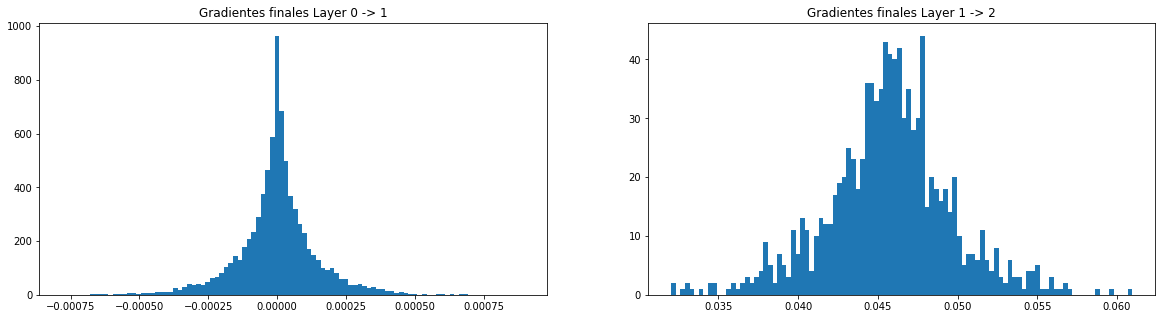

In [456]:
# Gradients fin 2
plt.rcParams["figure.figsize"]=[20,5]
for j, i in enumerate(np.arange(0,2)):
    plt.subplot(1,2,j + 1)
    aux = np.reshape(grad_fin_2[i],(grad_fin_2[i].shape[0]*grad_fin_2[i].shape[1]))
    plt.hist(aux ,bins=100) # Error debido a la divergencia
    plt.title(f'Gradientes finales Layer {j} -> {j  + 1}')
plt.show() #and weights!!!!

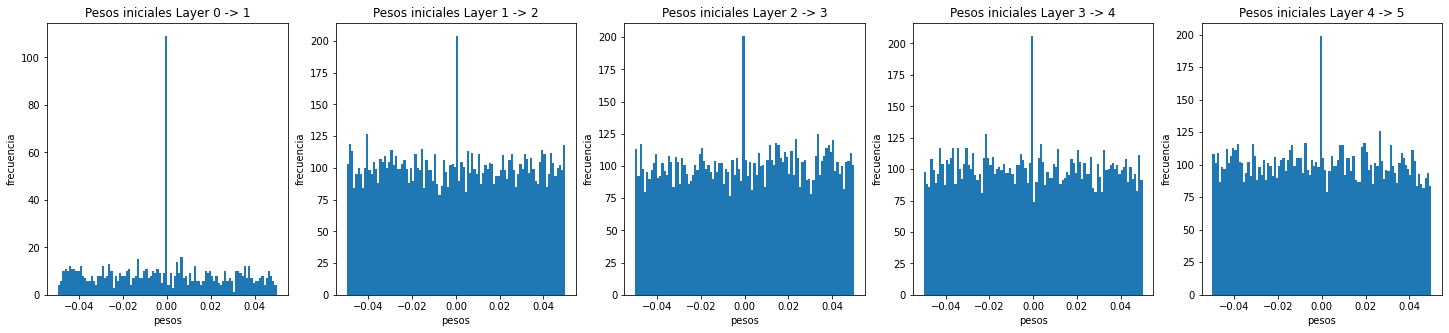

In [457]:
# Weights ini 1
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_ini_1[i].reshape((weights_ini_1[i].shape[0]*weights_ini_1[i].shape[1])),weights_ini_1[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos iniciales Layer {j} -> {j  + 1}')
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
    
plt.show()

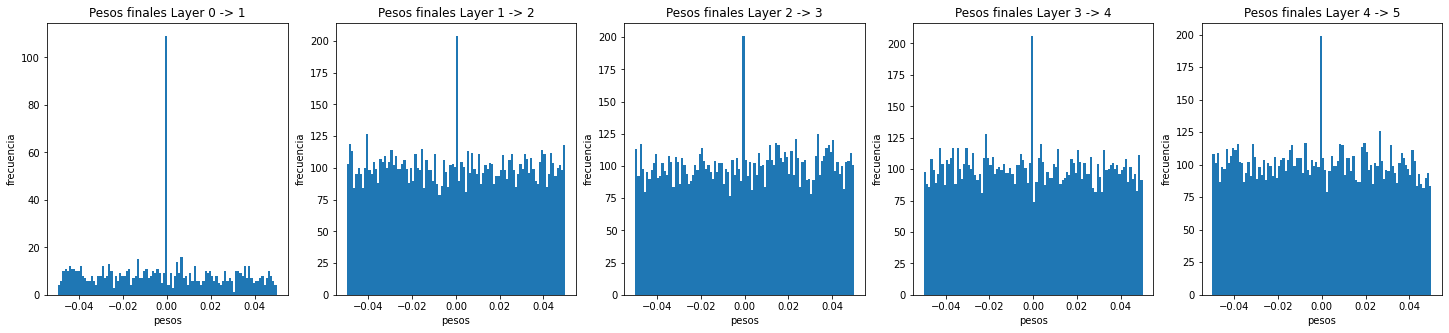

In [458]:
# Weights fin 1
plt.rcParams["figure.figsize"]=[25,5]
for j, i in enumerate(np.arange(0,10,2)):
    plt.subplot(1,5,j + 1)
    #plt.hist( np.vstack([weights_1[i][:][:],weights_1[i+1]]).T, bins= [-1e-01,-1e-02,-1e-03,0,1e-03,1e-02,1e-01] ,label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    aux = np.append(weights_fin_1[i].reshape((weights_fin_1[i].shape[0]*weights_fin_1[i].shape[1])),weights_fin_1[i+1])
    #plt.hist(aux , range=(aux.min(),aux.max()),label=["layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?","layer o bias?:1,2,3,4,5?"])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos finales Layer {j} -> {j  + 1}')
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
plt.show()

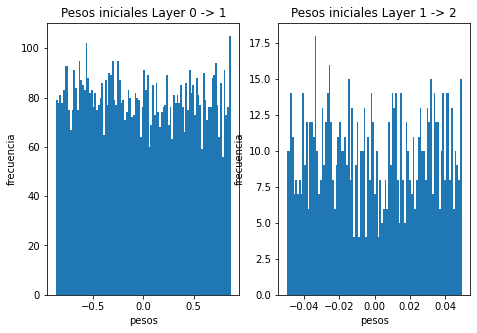

In [459]:
# Weights ini 2
plt.rcParams["figure.figsize"]=[20,5]
for j, i in enumerate(np.arange(0,2)):
    plt.subplot(1,5,j + 1)
    aux = np.reshape(weights_ini_2[i],(weights_ini_2[i].shape[0]*weights_ini_2[i].shape[1]))
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos iniciales Layer {j} -> {j  + 1}')
    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
plt.show() #and weights!!!!

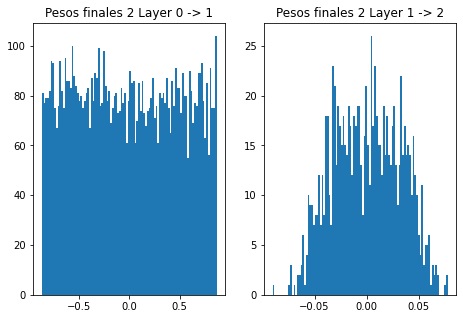

In [460]:
# Weights fin 2
plt.rcParams["figure.figsize"]=[20,5]
for j, i in enumerate(np.arange(0,2)):
    plt.subplot(1,5,j + 1)
    aux = np.reshape(weights_fin_2[i],(weights_fin_2[i].shape[0]*weights_fin_2[i].shape[1]))
    plt.hist(aux ,bins=100) # Error debido a la divergencia
    plt.title(f'Pesos finales 2 Layer {j} -> {j  + 1}')
plt.show() #and weights!!!!

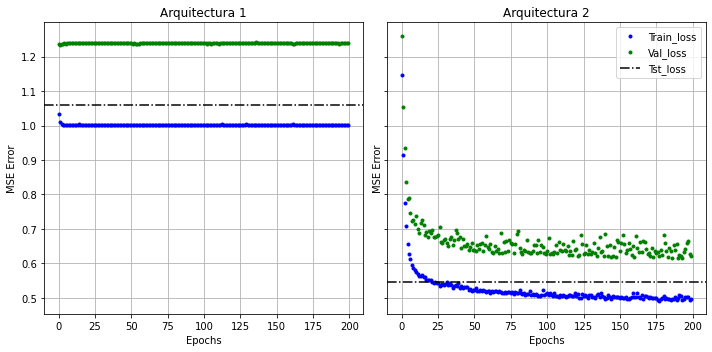

In [461]:
test_loss_1 = tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model_1(x_test))).numpy()
test_loss_2 = tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model_2(x_test))).numpy()

histories = []
test_losses = []
titles = []

histories.append(hist1.history)
histories.append(hist2.history)
test_losses.append(test_loss_1)
test_losses.append(test_loss_2)

titles.append(f'Arquitectura 1')
titles.append(f'Arquitectura 2')

plt.rcParams['figure.figsize']=[10,5]

graph_results(histories,test_losses,titles)

# Comentarios
Learning rate 0.001 (original):

Podemos notar una clara divergencia para la arquitectura número dos, de hecho es imposible realizar algunos gráficos debido a valores nan. Por otro lado el comportamiento de la arquitectura 1 es similar, la pérdida oscila alrededor de 1 y no es posible observar convergencia. Respecto a los pesos de la arquitectura no se observa ningún cambio aparente. En los gradientes de la arquitectura 1 notamos cambios del estado inicial al final, dichos cambios son los que han generado la divergencia. En la arquitectura 2 al haber divergencia nos encontramos con valores Nan.

Learning rate 0.0001:

Respecto a los gradientes, notamos que después de realizar el entrenamiento de la red neuronal, la frecuencia de los gradientes muy cercanos a 0 aumenta considerablemente, esto ya que, para cada iteración los pesos se acercan cada vez más al mínimo, provocando así que la magnitud de los últimos gradientes calculados disminuya mientras más se acerca a un mínimo.

Respecto a los pesos podemos observar que para la arquitectura 1 los pesos se distribuyen de la misma forma al incio y al final del entrenamiento, esto junto al gráfico presentado en la celda anterior nos indica que el entrenamiento ha sido muy poco fructifero, la variación error tanto en el training set como en el validation set es prácticamente imperceptible. Para la arquitectura 2 podemos notar cómo los pesos que van de la capa uno a la dos se centran un poco más en cero.

Finalmente respecto al error de los modelos entrenados podemos mencionar que con un learning rate 0.0001 la arquitectura 2 presenta una disminución del error de aproximadamente un 40% tanto para el training set como para el validation set, mientras que para la arquitectura 1 solo un 2.3%. 

PD: Ejecutamos muchas veces las últimas celdas para que el gráfico de la arquitectura 1 saliera bien. Durante el desarrollo de la tarea aveces salía correctamente y aveces se bugeaba al igual que ahora. 

## 1.d Regularización

##### i) Utilizando la siguiente arquitectura experimente con regularización l1 y l2 usando distintos valores de $\lambda$ para las distintas capas, pero manteniendo el mismo tipo de regularización en ambas capas (l1 ó l2). **Entrene** 4 redes neuronales para cada norma con distintos valores de $\lambda$ en cada capa (8 redes en total). Utilice las variaciones de $\lambda$ que desee, puede usar las indicadas si desea. **Visualice y comente** los errores de entrenamiento, validación **y la resta de ambos errores** (e.d error_tr-error_val). 

**Pregunta:** ¿Cómo se comportarán los pesos de la red neuronal para la norma l1 y para la norma l2 en función de $\lambda$? **Apoyarse en visualización de los pesos al final del entrenamiento para responder la pregunta.**

# Respuesta

Para la norma L1 observamos que a medida que $\lambda$ disminuye la varianza de los valores de los pesos disminuye, como estos pesos están centrados en cero observamos que la frecuencia de los valores cercanos a 0 comienza a aumentar. Por el contrario, para la norma L2 observamos que a medida que $\lambda$ disminuye los valores de los pesos están cada vez más disperso y siempre centrado en 0.

In [61]:
pesos = []

In [62]:
from keras.regularizers import l1,l2
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:
lambda_1st=[0.1,1.1,0.4,0.01]
lambda_2nd=[0.2,1.2,0.6,0.02]

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_1st[0]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_2nd[0]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist1 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [63]:
# Variaciones de Lambda
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_1st[1]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_2nd[1]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist2 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [64]:
#Variaciones de lambda
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_1st[2]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_2nd[2]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist3 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [65]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_1st[3]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l1(lambda_2nd[3]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist4 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [66]:
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_1st[0]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_2nd[0]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist5 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [67]:
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_1st[1]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_2nd[1]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist6 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [68]:
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_1st[2]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_2nd[2]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist7 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

In [69]:
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_1st[3]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dense(500, activation='relu',activity_regularizer=l2(lambda_2nd[3]),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
# Train model
hist8 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
pesos.append(model.get_weights())

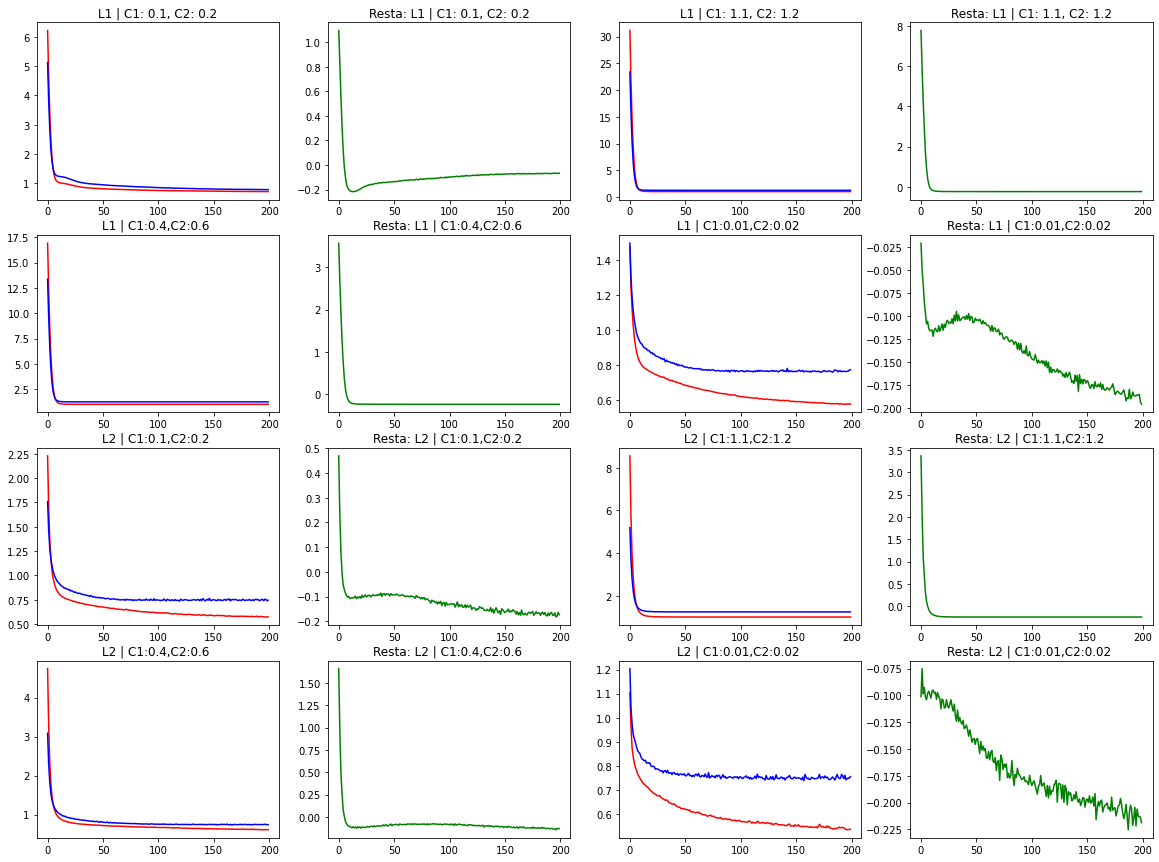

In [70]:
# lambda_1st=[0.1,1.1,0.4,0.01]
# lambda_2nd=[0.2,1.2,0.6,0.02]
reg_titles = ["L1 | C1: 0.1, C2: 0.2","L1 | C1: 1.1, C2: 1.2","L1 | C1:0.4,C2:0.6 ","L1 | C1:0.01,C2:0.02 ", "L2 | C1:0.1,C2:0.2 ","L2 | C1:1.1,C2:1.2 ","L2 | C1:0.4,C2:0.6 ","L2 | C1:0.01,C2:0.02 "]
plt.rcParams["figure.figsize"]=[20,15]
plt.subplot(4,4,1)
plt.title("L1 | C1: 0.1, C2: 0.2")
plt.plot(hist1.history["loss"],"r")
plt.plot(hist1.history["val_loss"],"b")
plt.subplot(4,4,2)
plt.title("Resta: L1 | C1: 0.1, C2: 0.2")
plt.plot(np.asarray(hist1.history["loss"])-np.asarray(hist1.history["val_loss"]),"g")

plt.subplot(4,4,3)
plt.title("L1 | C1: 1.1, C2: 1.2")
plt.plot(hist2.history["loss"],"r")
plt.plot(hist2.history["val_loss"],"b")
plt.subplot(4,4,4)
plt.title("Resta: L1 | C1: 1.1, C2: 1.2")
plt.plot(np.asarray(hist2.history["loss"])-np.asarray(hist2.history["val_loss"]),"g")

plt.subplot(4,4,5)
plt.title("L1 | C1:0.4,C2:0.6 ")
plt.plot(hist3.history["loss"],"r")
plt.plot(hist3.history["val_loss"],"b")
plt.subplot(4,4,6)
plt.title("Resta: L1 | C1:0.4,C2:0.6 ")
plt.plot(np.asarray(hist3.history["loss"])-np.asarray(hist3.history["val_loss"]),"g")

plt.subplot(4,4,7)
plt.title("L1 | C1:0.01,C2:0.02 ")
plt.plot(hist4.history["loss"],"r")
plt.plot(hist4.history["val_loss"],"b")
plt.subplot(4,4,8)
plt.title("Resta: L1 | C1:0.01,C2:0.02 ")

plt.plot(np.asarray(hist4.history["loss"])-np.asarray(hist4.history["val_loss"]),"g")

plt.subplot(4,4,9)
plt.title("L2 | C1:0.1,C2:0.2 ")
plt.plot(hist5.history["loss"],"r")
plt.plot(hist5.history["val_loss"],"b")
plt.subplot(4,4,10)
plt.title("Resta: L2 | C1:0.1,C2:0.2 ")
plt.plot(np.asarray(hist5.history["loss"])-np.asarray(hist5.history["val_loss"]),"g")

plt.subplot(4,4,11)
plt.title("L2 | C1:1.1,C2:1.2 ")
plt.plot(hist6.history["loss"],"r")
plt.plot(hist6.history["val_loss"],"b")
plt.subplot(4,4,12)
plt.title("Resta: L2 | C1:1.1,C2:1.2 ")
plt.plot(np.asarray(hist6.history["loss"])-np.asarray(hist6.history["val_loss"]),"g")

plt.subplot(4,4,13)
plt.title("L2 | C1:0.4,C2:0.6 ")
plt.plot(hist7.history["loss"],"r")
plt.plot(hist7.history["val_loss"],"b")
plt.subplot(4,4,14)
plt.title("Resta: L2 | C1:0.4,C2:0.6 ")
plt.plot(np.asarray(hist7.history["loss"])-np.asarray(hist7.history["val_loss"]),"g")

plt.subplot(4,4,15)
plt.title("L2 | C1:0.01,C2:0.02 ")
plt.plot(hist8.history["loss"],"r")
plt.plot(hist8.history["val_loss"],"b")
plt.subplot(4,4,16)
plt.title("Resta: L2 | C1:0.01,C2:0.02 ")
plt.plot(np.asarray(hist8.history["loss"])-np.asarray(hist8.history["val_loss"]),"g")

plt.show()

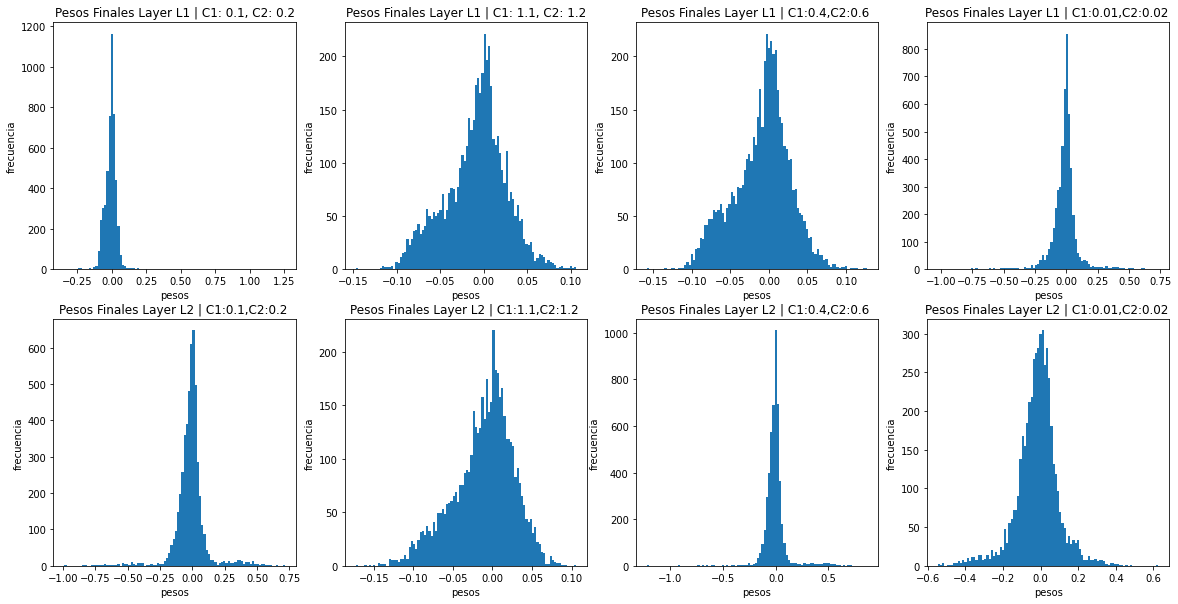

In [71]:
# Weights pos-entrenamiento
plt.rcParams["figure.figsize"]=[20,10]
for i in range(len(pesos)):
    plt.subplot(2,4,i + 1)
    aux = np.array([])
    for j in np.arange(0,4,2):
        aux = np.append(np.append(aux,pesos[i][j].reshape((pesos[i][j].shape[0]*pesos[i][j].shape[1]))),pesos[i][j+1])
    plt.hist(aux ,bins=100)
    plt.title(f'Pesos Finales Layer {reg_titles[i]}')

    plt.xlabel("pesos")
    plt.ylabel("frecuencia")
    
plt.show()

# Comentarios

Para la norma L1 podemos observar claramente que a medida que $\lambda$ aumenta, las curvas de las pérdidas en ambos conjuntos se asemejan más y por lo tanto la gráfica de la diferencia de estas tiende un valor muy cercano a 0 (pues estamos restando cantidades cada vez más parecidas). 

Para la norma L2 observamos la misma relación. Sin embargo los valores de pérdida obtenidos son menores.

Para algunos de los modelos el overfitting es visible. La gráfica de la diferencia en la pérdida nos ayuda también a identificarlo claramente cuando vemos un comportamiento que no converge a un valor constante.

##### II) Experimentaremos con el método dropout. Probaremos con distintos valores de Dropout para ambas capas de la arquitectura presentada, de manera similar al punto anterior. Entrene 9 redes neuronales utilizando las combinaciones indicadas. **Visualizar, comparar y comentar** utilizando los errores de entrenamiento, validación y la resta entre ambos valores.

**Preguntas:** ¿Qué es/hace dropout? ¿Por qué es considerado un método de regularización?

### Respuesta
Es una técnica de regularización que utiliza la idea de desactivar temporalmente neuronas de forma aleatoria en cada capa por cada iteración del entrenamiento, lo cual, permite evitar que una neurona memorice una parte específica de la entrada de entrenamiento. Se considera un método de regularización, ya que, incide directamente en la actualización de los pesos para cada iteración, evitando así el sobre ajuste.

In [180]:
dropout_1st_layer=[0,0.3,0.6]
dropout_2nd_layer=[0,0.3,0.6]

# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[0])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[0])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist1 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [143]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[0])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[1])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist2 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [134]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[0])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[2])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist3 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [166]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[1])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[0])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist4 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [150]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[1])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[1])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist5 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [189]:
# Define architecture 
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[1])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[2])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist6 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [173]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[2])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[0])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist7 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [139]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[2])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[1])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist8 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [197]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
dense=layers.Dropout(dropout_1st_layer[2])(dense)
dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
dense=layers.Dropout(dropout_2nd_layer[2])(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist9 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

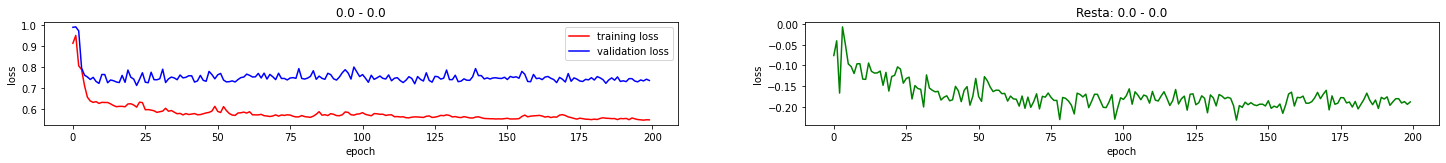

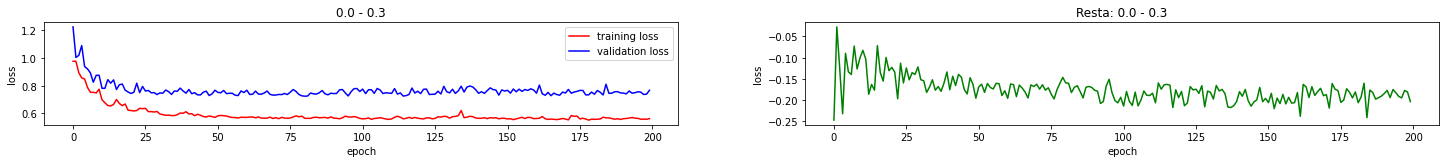

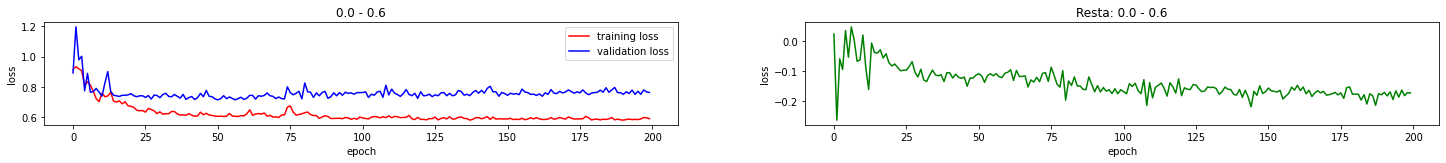

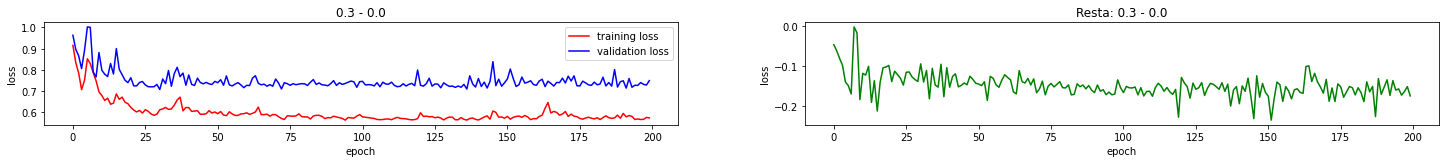

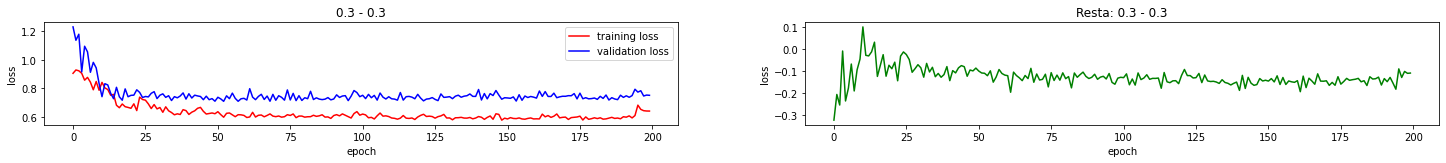

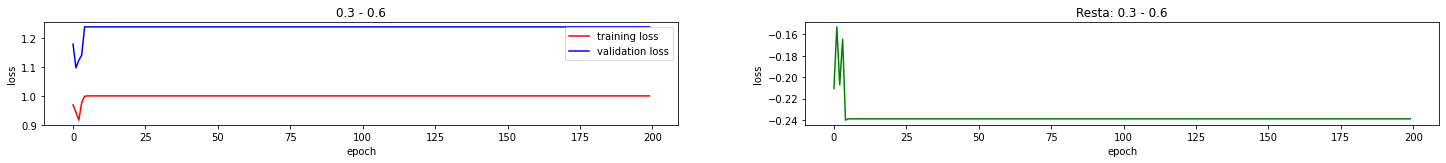

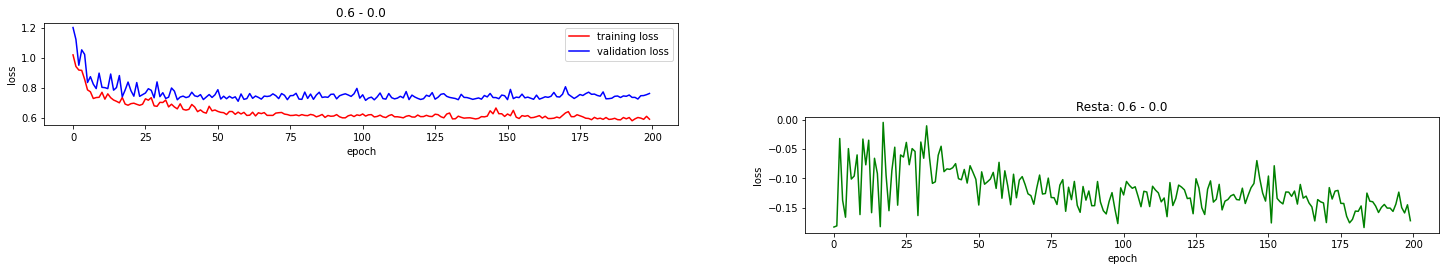

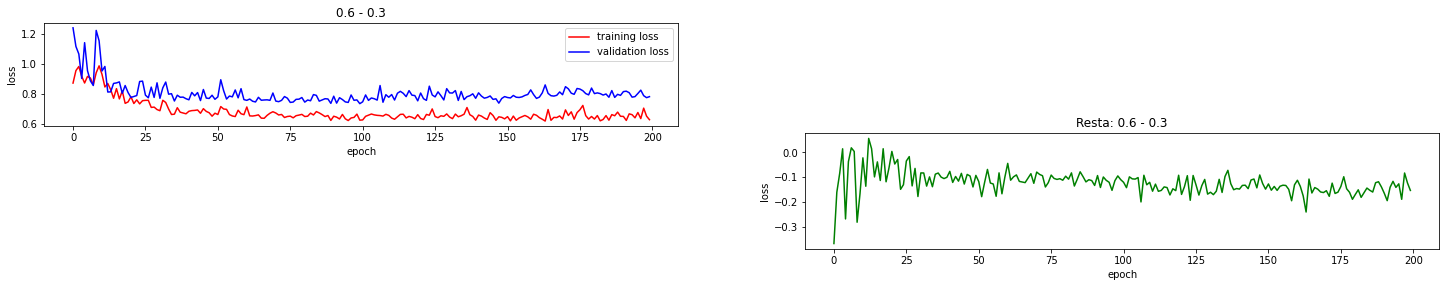

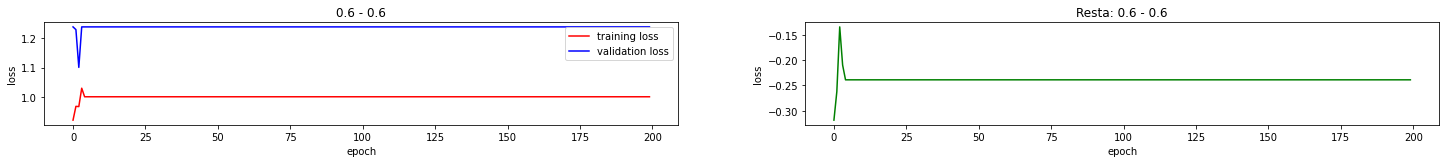

In [198]:
plt.rcParams["figure.figsize"]=[25,20]
plt.subplot(9,2,1)
plt.title("0.0 - 0.0")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist1.history["loss"],"r", label="training loss")
plt.plot(hist1.history["val_loss"],"b", label="validation loss")
plt.legend()
plt.subplot(9,2,2)
plt.plot(np.asarray(hist1.history["loss"])-np.asarray(hist1.history["val_loss"]),"g")
plt.title("Resta: 0.0 - 0.0")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.subplot(9,2,3)
plt.title("0.0 - 0.3")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist2.history["loss"],"r", label="training loss")
plt.plot(hist2.history["val_loss"],"b", label="validation loss")
plt.legend()
plt.subplot(9,2,4)
plt.title("Resta: 0.0 - 0.3")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist2.history["loss"])-np.asarray(hist2.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,5)
plt.title("0.0 - 0.6")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(hist3.history["loss"],"r", label="training loss")
plt.plot(hist3.history["val_loss"],"b", label="validation loss")
plt.legend()
plt.subplot(9,2,6)
plt.title("Resta: 0.0 - 0.6")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist3.history["loss"])-np.asarray(hist3.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,7)
plt.title("0.3 - 0.0")
plt.plot(hist4.history["loss"],"r", label="training loss")
plt.plot(hist4.history["val_loss"],"b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(9,2,8)
plt.title("Resta: 0.3 - 0.0")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist4.history["loss"])-np.asarray(hist4.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,9)
plt.title("0.3 - 0.3")
plt.plot(hist5.history["loss"],"r", label="training loss")
plt.plot(hist5.history["val_loss"],"b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(9,2,10)
plt.title("Resta: 0.3 - 0.3")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist5.history["loss"])-np.asarray(hist5.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,11)
plt.title("0.3 - 0.6")
plt.plot(hist6.history["loss"],"r", label = "training loss")
plt.plot(hist6.history["val_loss"],"b", label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(9,2,12)
plt.title("Resta: 0.3 - 0.6")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist6.history["loss"])-np.asarray(hist6.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,13)
plt.title("0.6 - 0.0")
plt.plot(hist7.history["loss"],"r", label="training loss")
plt.plot(hist7.history["val_loss"],"b", label ="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(8,2,14)
plt.title("Resta: 0.6 - 0.0")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist7.history["loss"])-np.asarray(hist7.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,15)
plt.title("0.6 - 0.3")
plt.plot(hist8.history["loss"],"r", label="training loss")
plt.plot(hist8.history["val_loss"],"b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(8,2,16)
plt.title("Resta: 0.6 - 0.3")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist8.history["loss"])-np.asarray(hist8.history["val_loss"]),"g")
plt.show()

plt.subplot(9,2,17)
plt.title("0.6 - 0.6")
plt.plot(hist9.history["loss"],"r", label="training loss")
plt.plot(hist9.history["val_loss"],"b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(9,2,18)
plt.title("Resta: 0.6 - 0.6")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.asarray(hist9.history["loss"])-np.asarray(hist9.history["val_loss"]),"g")
plt.show()

### Comentarios

Podemos notar que en la primera gráfica (sin dropout) en las últimas epochs es visible un leve overfitting. Al aumentar la probabilidad de dropout para la segunda capa notamos cómo se reduce el overfitting y las pérdidas en el training y validation set toman valores más cercanos, esto se puede visualizar en la gráfica de las restas.

De manera general podemos comentar además que el utilizar dropout disminuye el validation error. 

## 1.e Extreme Learning Machines

##### I) Una aproximación para obtener modelos grandes que no sobreajustan es la implementada por ELM. Explique en qué consiste la idea de ELM y por qué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

Entrene una ELM de una capa fija y una capa oculta, la primera con un número relativamente grande. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes.

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. 

**Preguntas:** ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

### Respuesta:
En comparativa con las redes anteriores, el desempeño de la ELM es destacable, en 200 epochs logra un muy buen resultado, un error bajo y no se visualiza overfitting a pesar de que el modelo tiene 50.001 parámetros. No, el número elevando de parámetros totales no implica necesariamente overfitting, ya que, podríamos tener un gran porcentaje de neuronas en modo no entrenable y solo unas pocas entrenables, lo cual en cierto grado, disminuye la complejidad del modelo, emulando un modelo con menos parámetros. De lo anterior, se desprende que el overfitting es provocado principalmente cuando los pesos de las conexiones neuronales se ajustan para memorizar ejemplos específicos del conjunto de entrenamiento, si bloqueamos la modificación de pesos para un número importante de neuronas, estaremos evitando la memorización.

In [82]:
# Define architecture
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(5000, activation='relu',use_bias=True,trainable=False)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist10 = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

In [83]:
model.summary()

Model: "functional_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_204 (Dense)            (None, 5000)              45000     
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 5001      
Total params: 50,001
Trainable params: 5,001
Non-trainable params: 45,000
_________________________________________________________________


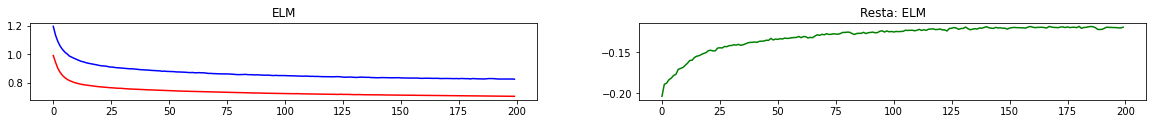

In [84]:
plt.subplot(9,2,17)
plt.title("ELM")
plt.plot(hist10.history["loss"],"r")
plt.plot(hist10.history["val_loss"],"b")
plt.subplot(9,2,18)
plt.title("Resta: ELM")
plt.plot(np.asarray(hist10.history["loss"])-np.asarray(hist10.history["val_loss"]),"g")
plt.show()